In [1]:
# Load the features extracted from filtered data with tsfresh
import pandas as pd

data = pd.read_csv("/Volumes/Mac/DatasetSP/pipeline1/combined_features_1.csv")

In [2]:
# Split the data into costruction and test set
#Soggetti nel training set: [8, 16, 1, 9, 6, 19, 20, 17, 4, 7, 25, 3]
#Soggetti nel test set: [2, 15, 22]

costruction_set = data[data['Subject'].isin([8, 16, 1, 9, 6, 19, 20, 17, 4, 7, 25, 3])]
test_set = data[data['Subject'].isin([2, 15, 22])]

In [3]:
# Save the dataset
costruction_set.to_csv("/Volumes/Mac/DatasetSP/pipeline1/costruction_set_1.csv", index=False)
test_set.to_csv("/Volumes/Mac/DatasetSP/pipeline1/test_set_1.csv", index=False)

In [3]:
metadata = costruction_set[['Subject', 'Test', 'Trial', 'Bout', 'Position']]
#costruction_set = costruction_set.drop(columns=['Subject', 'Test', 'Trial', 'Bout', 'Position'])

In [3]:
features = costruction_set
missing_values = features.drop(columns=['Subject', 'Test', 'Trial', 'Bout', 'Position']).isnull().sum()
print("Missing values:")
display(missing_values[missing_values > 0])

Missing values:


Acc_value__fft_coefficient__attr_"real"__coeff_51               126111
Acc_value__fft_coefficient__attr_"real"__coeff_52               126111
Acc_value__fft_coefficient__attr_"real"__coeff_53               126111
Acc_value__fft_coefficient__attr_"real"__coeff_54               126111
Acc_value__fft_coefficient__attr_"real"__coeff_55               126111
                                                                 ...  
Gyr_value__fft_coefficient__attr_"angle"__coeff_96              126111
Gyr_value__fft_coefficient__attr_"angle"__coeff_97              126111
Gyr_value__fft_coefficient__attr_"angle"__coeff_98              126111
Gyr_value__fft_coefficient__attr_"angle"__coeff_99              126111
Gyr_value__query_similarity_count__query_None__threshold_0.0    126111
Length: 396, dtype: int64

In [4]:
threshold = 0.9
valid_percentage = features.notnull().mean()
valid_columns = valid_percentage[valid_percentage > threshold].index
features = features[valid_columns]

print(f"Number of features after removing columns with missing values: {features.shape[1]}")

Number of features after removing columns with missing values: 1177


In [6]:
features = features.replace([float('inf'), float('-inf')], pd.NA)
rows_with_null = features[features.isnull().any(axis=1)]
print(f"Number of rows with missing values: {len(rows_with_null)}")

Number of rows with missing values: 71


In [7]:
null_columns_per_row = rows_with_null.isnull().apply(lambda x: features.columns[x].tolist(), axis=1)

for idx, cols in null_columns_per_row.items():
    print(f"Row {idx} has missing values in columns: {cols}")


Row 28152 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53753 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53756 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53758 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53759 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53760 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53761 has missing values in columns: ['Acc_value__fft_aggregated__aggtype_"skew"', 'Acc_value__fft_aggregated__aggtype_"kurtosis"']
Row 53762 has missing values in columns: ['Acc_v

In [8]:
# NaN values imputation

for idx, row in rows_with_null.iterrows():
    bout = row["Bout"]
    subject = row["Subject"]
    test = row["Test"]
    trial = row["Trial"]

    bout_data = features[
    (features["Bout"] == bout) &
    (features["Subject"] == subject) &
    (features["Test"] == test) &
    (features["Trial"] == trial)   
    ]
    nan_columns = row[row.isnull()].index
    row_position = bout_data.index.get_loc(idx)
    if row_position > 0:  
        replacement_row = bout_data.iloc[row_position - 1]
    elif row_position < len(bout_data) - 1: 
        replacement_row = bout_data.iloc[row_position + 1]

    for col in nan_columns:
        features.loc[idx, col] = replacement_row[col]

print("Imputation ended.")


Imputation ended.


In [9]:
# Check if there are still missing values
missing_values = features.isnull().sum()
print("Missing values:")
display(missing_values[missing_values > 0])

Missing values:


Series([], dtype: int64)

In [10]:
# Remove the features with constant value
unique_values = features.drop(columns=['Subject', 'Test', 'Trial', 'Bout', 'Position']).nunique()
constant_columns = unique_values[unique_values == 1].index
features = features.drop(columns=constant_columns)
print(f"Number of features after removing constant columns: {features.shape[1]}")

Number of features after removing constant columns: 1063


In [11]:
# Save the dataset cleaned

features.to_csv("/Volumes/Mac/DatasetSP/pipeline1/cleaned_costruction_1.csv", index=False)

In [2]:
# Load the cleaned dataset
import pandas as pd

features = pd.read_csv("/Volumes/Mac/DatasetSP/pipeline1/cleaned_costruction_1.csv")

In [ ]:
# PROVA MI IN PROBLEMA BINARIO FEATRURES VS POSTION (HAND, LOWER BACK)
# NON RUNNARE
# Isolate only the data for position 0 and 3
"""
features_position_0 = features[features["Position"] == 0]
features_position_3 = features[features["Position"] == 3]
LBandH_df = pd.concat([features_position_0, features_position_3])
display(LBandH_df.describe())
"""

Subject          Test         Trial          Bout      Position  \
count  55162.000000  55162.000000  55162.000000  55162.000000  55162.000000   
mean      10.942279      9.515427      3.541859     13.863022      1.461767   
std        7.524735      1.257348      1.054710     12.045767      1.499526   
min        1.000000      4.000000      1.000000      1.000000      0.000000   
25%        3.000000     10.000000      4.000000      3.000000      0.000000   
50%        9.000000     10.000000      4.000000     10.000000      0.000000   
75%       17.000000     10.000000      4.000000     24.000000      3.000000   
max       25.000000     10.000000      4.000000     72.000000      3.000000   

       Acc_value__variance_larger_than_standard_deviation  \
count                                       55162.000000    
mean                                            0.883525    
std                                             0.320797    
min                                             0.000000    
25%                                             1.000000    
50%                                             1.000000    
75%                                             1.000000    
max                                             1.000000    

       Acc_value__has_duplicate_max  Acc_value__has_duplicate_min  \
count                       55162.0                       55162.0   
mean                            0.0                           0.0   
std                             0.0                           0.0   
min                             0.0                           0.0   
25%                             0.0                           0.0   
50%                             0.0                           0.0   
75%                             0.0                           0.0   
max                             0.0                           0.0   

       Acc_value__has_duplicate  Acc_value__sum_values  ...  \
count                   55162.0           55162.000000  ...   
mean                        0.0            1053.752565  ...   
std                         0.0              92.781582  ...   
min                         0.0             818.781128  ...   
25%                         0.0            1000.943944  ...   
50%                         0.0            1029.200972  ...   
75%                         0.0            1070.752788  ...   
max                         0.0            5359.264715  ...   

       Gyr_value__fourier_entropy__bins_3  Gyr_value__fourier_entropy__bins_5  \
count                        55162.000000                        55162.000000   
mean                             0.265625                            0.380711   
std                              0.105560                            0.153808   
min                              0.096509                            0.096509   
25%                              0.192626                            0.261160   
50%                              0.261160                            0.356468   
75%                              0.329286                            0.481199   
max                              0.866986                            1.166251   

       Gyr_value__fourier_entropy__bins_10  \
count                         55162.000000   
mean                              0.546192   
std                               0.218661   
min                               0.096509   
25%                               0.383650   
50%                               0.518641   
75%                               0.679071   
max                               1.662349   

       Gyr_value__fourier_entropy__bins_100  \
count                          55162.000000   
mean                               1.140048   
std                                0.405823   
min                                0.192626   
25%                                0.826563   
50%                                1.127170   
75%                                1.417825   
max                                3.07

In [5]:
# PROVA MI IN PROBLEMA BINARIO FEATRURES VS POSTION (HAND, LOWER BACK)
# NON RUNNARE
"""
features_df = LBandH_df.drop(columns=["Subject", "Test", "Trial", "Bout", "Position"])
"""


In [6]:
# PROVA MI IN PROBLEMA BINARIO FEATRURES VS POSTION (HAND, LOWER BACK)
# NON RUNNARE
# Mutual information
"""from sklearn.feature_selection import mutual_info_classif

target = LBandH_df["Position"]
mutual_info = mutual_info_classif(features_df, target)
mutual_info_df = pd.DataFrame({"Feature": features_df.columns, "Mutual_Info": mutual_info})
mutual_info_df = mutual_info_df.sort_values(by="Mutual_Info", ascending=False)

display(mutual_info_df.describe())
"""

Mutual_Info
count  1172.000000
mean      0.023707
std       0.029491
min       0.000000
25%       0.003207
50%       0.010445
75%       0.035683
max       0.141900

In [12]:
features_df = features.drop(columns=["Subject", "Test", "Trial", "Bout", "Position"])

In [13]:
# Mutual information
from sklearn.feature_selection import mutual_info_classif

target = features["Position"]
mutual_info = mutual_info_classif(features_df, target)
mutual_info_df = pd.DataFrame({"Feature": features_df.columns, "Mutual_Info": mutual_info})
mutual_info_df = mutual_info_df.sort_values(by="Mutual_Info", ascending=False)

display(mutual_info_df.describe())


Mutual_Info
count  1058.000000
mean      0.022081
std       0.021650
min       0.000000
25%       0.006219
50%       0.014706
75%       0.031825
max       0.112705

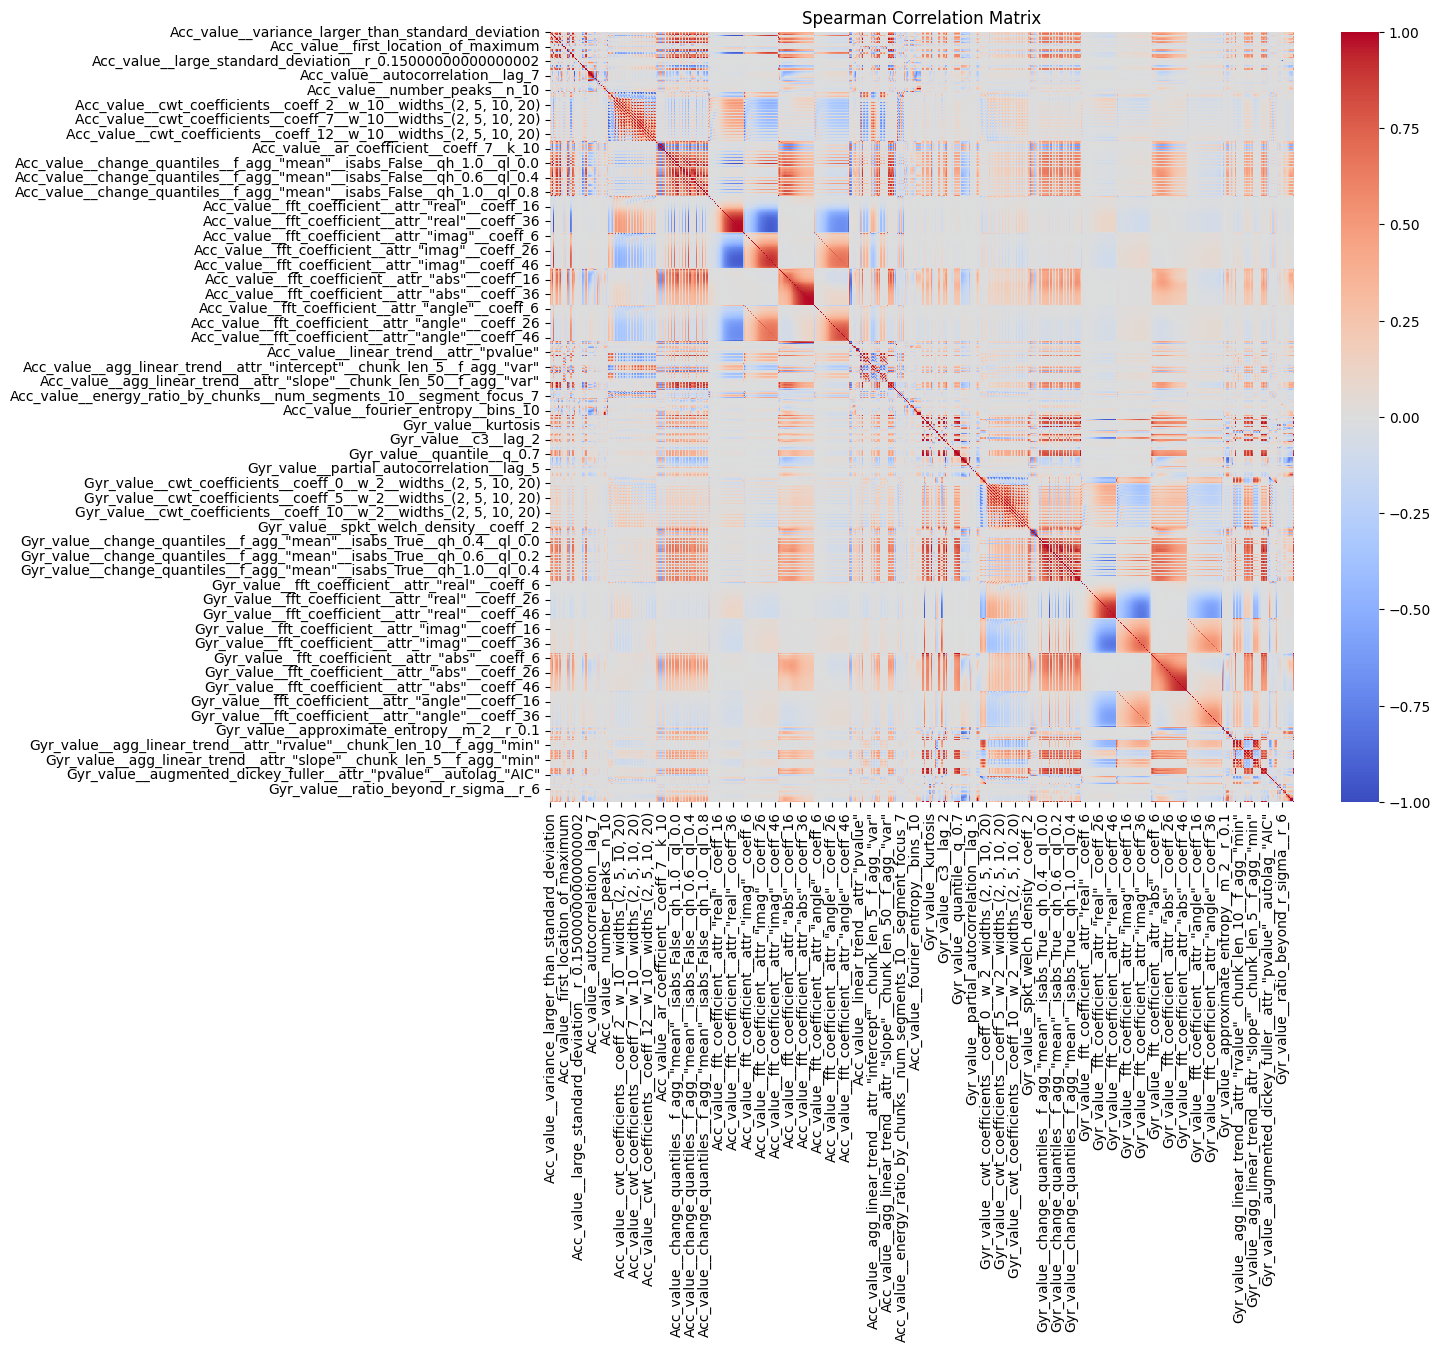

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_spearman = features_df.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_spearman, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Matrix")
plt.show()


In [15]:
correlation_threshold = 0.9

# Copia delle feature selezionate con alta Mutual Information
selected_features = mutual_info_df["Feature"].tolist()

# Rimuovi feature ridondanti
final_features = selected_features.copy()
for feature in selected_features:
    for other_feature in selected_features:
        if feature != other_feature and other_feature in final_features and feature in final_features:
            # Se la correlazione di Spearman tra le due feature è superiore alla soglia
            if abs(correlation_matrix_spearman.loc[feature, other_feature]) > correlation_threshold:
                # Mantieni la feature con Mutual Information più alta
                if mutual_info_df[mutual_info_df["Feature"] == feature]["Mutual_Info"].values[0] >= \
                   mutual_info_df[mutual_info_df["Feature"] == other_feature]["Mutual_Info"].values[0]:
                    final_features.remove(other_feature)
                else:
                    final_features.remove(feature)

# Risultato finale: dataset con le feature selezionate
informative_features_df = features_df[final_features]

print(f"Feature finali selezionate ({len(final_features)}):", final_features)

Feature finali selezionate (670): ['Gyr_value__c3__lag_3', 'Acc_value__cid_ce__normalize_True', 'Gyr_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"', 'Gyr_value__quantile__q_0.1', 'Acc_value__ar_coefficient__coeff_0__k_10', 'Gyr_value__permutation_entropy__dimension_4__tau_1', 'Gyr_value__fft_coefficient__attr_"abs"__coeff_1', 'Gyr_value__max_langevin_fixed_point__m_3__r_30', 'Gyr_value__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"max"', 'Gyr_value__fft_coefficient__attr_"abs"__coeff_2', 'Gyr_value__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"', 'Gyr_value__time_reversal_asymmetry_statistic__lag_3', 'Acc_value__ar_coefficient__coeff_5__k_10', 'Gyr_value__number_peaks__n_3', 'Gyr_value__spkt_welch_density__coeff_2', 'Gyr_value__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"var"', 'Acc_value__partial_autocorrelation__lag_1', 'Gyr_value__time_reversal_asymmetry_statistic__lag_1', 'Gyr_value__friedrich_coefficients__coeff_0__m_3__r_30'

In [16]:
informative_features_df = pd.concat([features[["Subject", "Test", "Trial", "Bout", "Position"]], informative_features_df], axis=1)


In [17]:
#Save the informative features post selection

informative_features_df.to_csv("/Volumes/Mac/DatasetSP/pipeline1/informative_features_costrset1.csv", index=False)

In [8]:
# Load the informative features
import pandas as pd

informative_features_df = pd.read_csv("/Volumes/Mac/DatasetSP/pipeline1/informative_features_costrset1.csv")

In [37]:
# Scaling 1-99 non tenendo conto delle variabili booleane
# Separazione delle variabili booleane
boolean_features = [col for col in informative_features_df.columns if informative_features_df[col].nunique() == 2]
numerical_features = informative_features_df.drop(columns=boolean_features + ["Subject", "Test", "Trial", "Bout", "Position"])
print(f"Numero di variabili booleane: {len(boolean_features)}")

P1 = numerical_features.quantile(0.01)
P99 = numerical_features.quantile(0.99)
features_scaled = (numerical_features - P1) / (P99 - P1)
features_scaled = numerical_features.clip(0, 1)  # Taglio dei valori fuori dal range [0, 1]

# Riunione delle variabili booleane
features_scaled = pd.concat([informative_features_df[["Subject", "Test", "Trial", "Bout", "Position"]], features_scaled, informative_features_df[boolean_features]], axis=1)

Numero di variabili booleane: 29


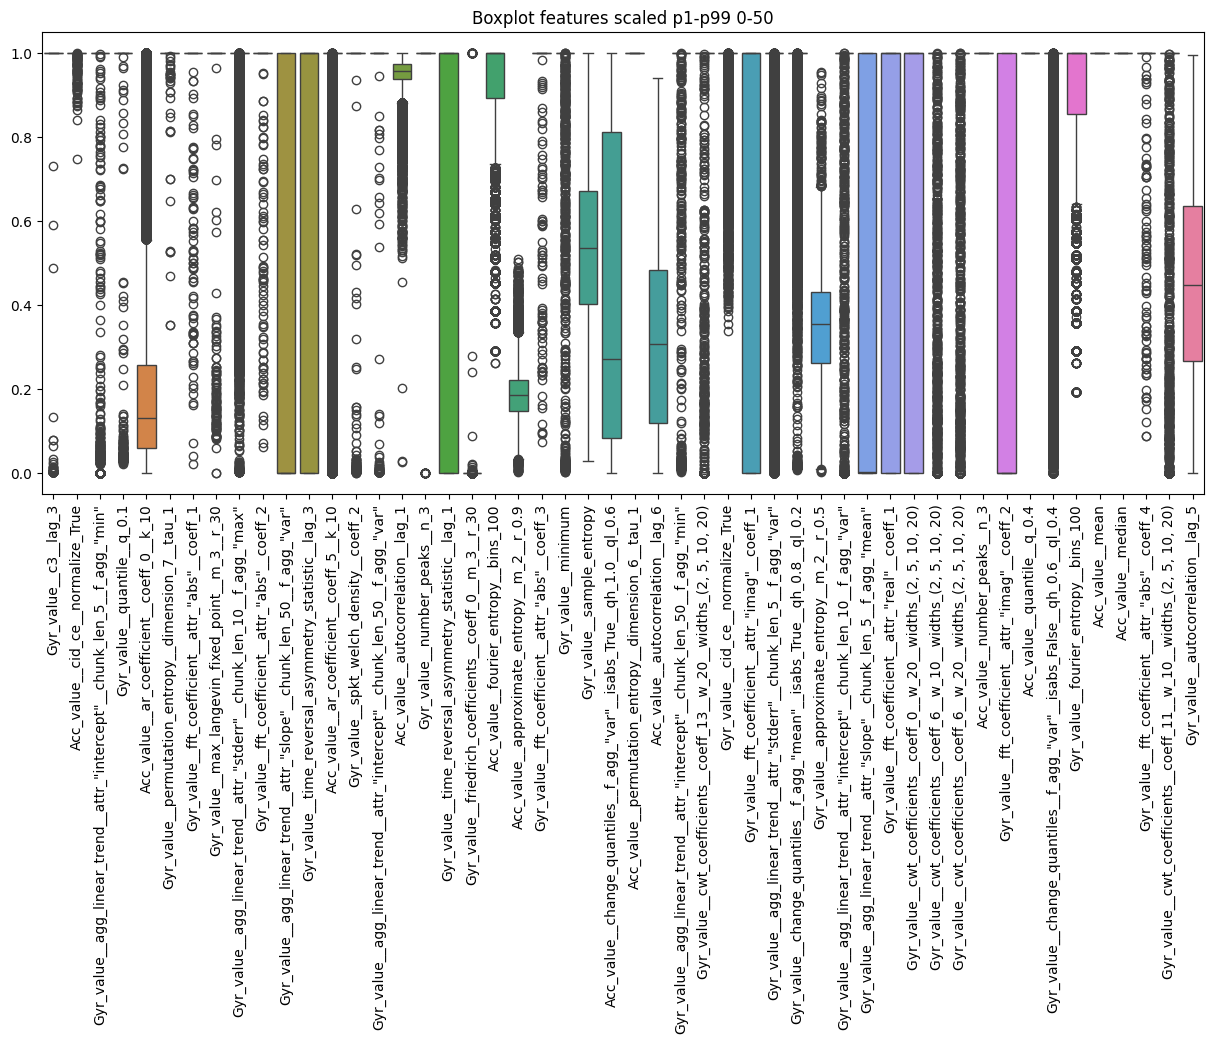

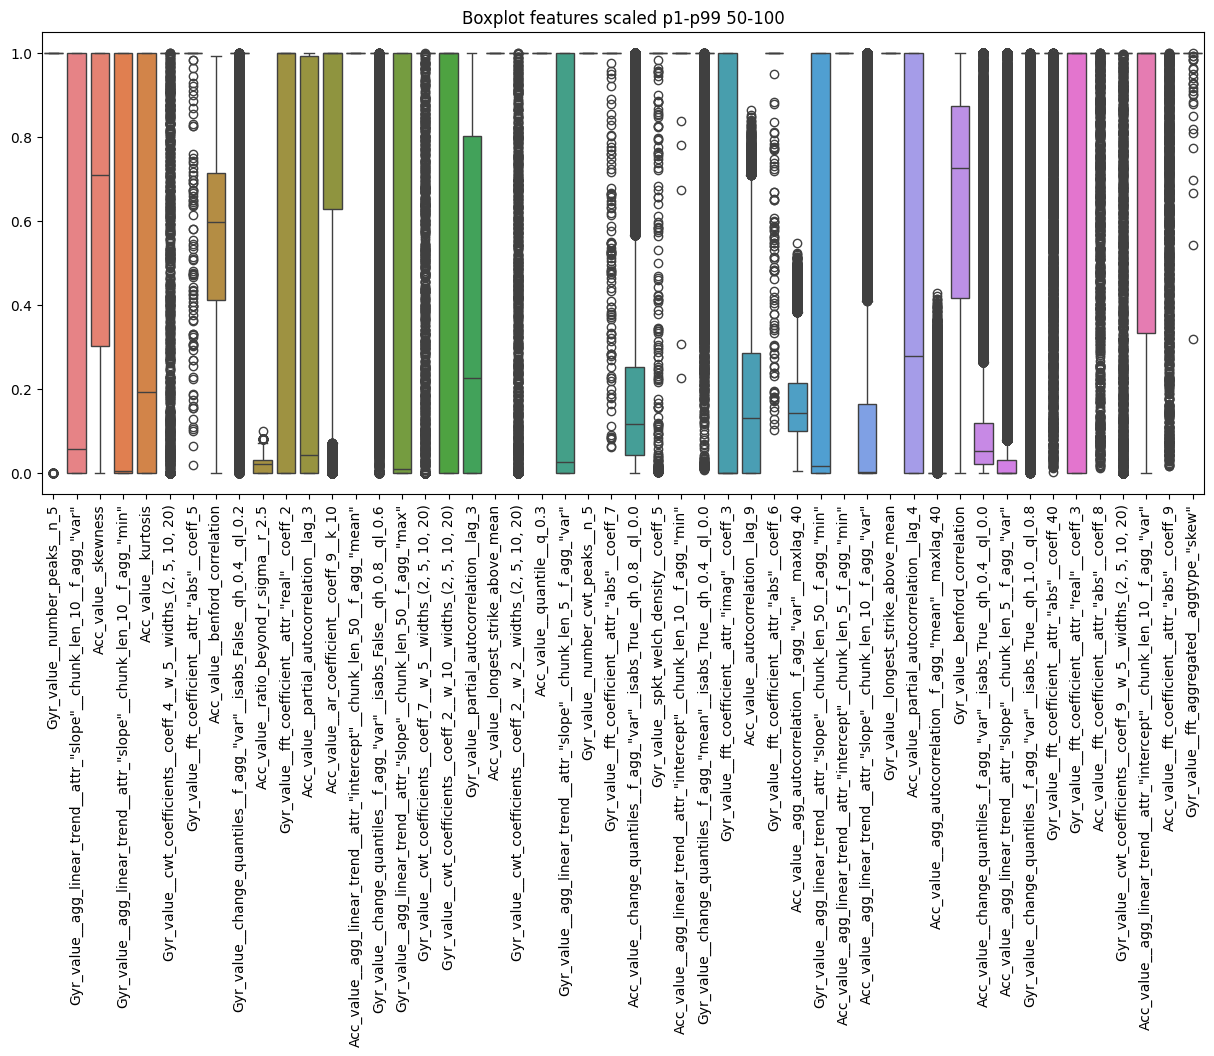

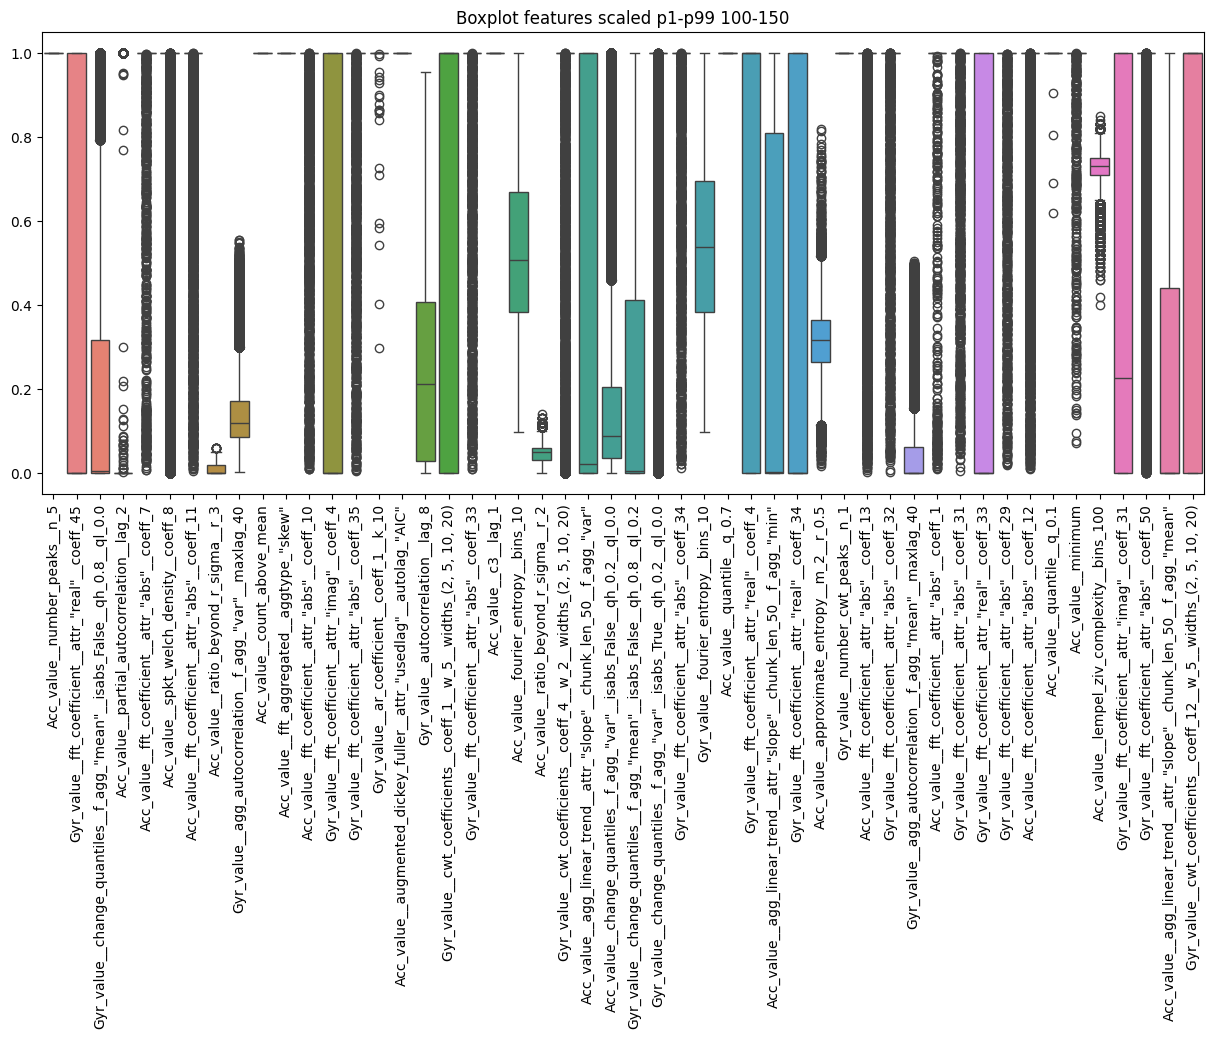

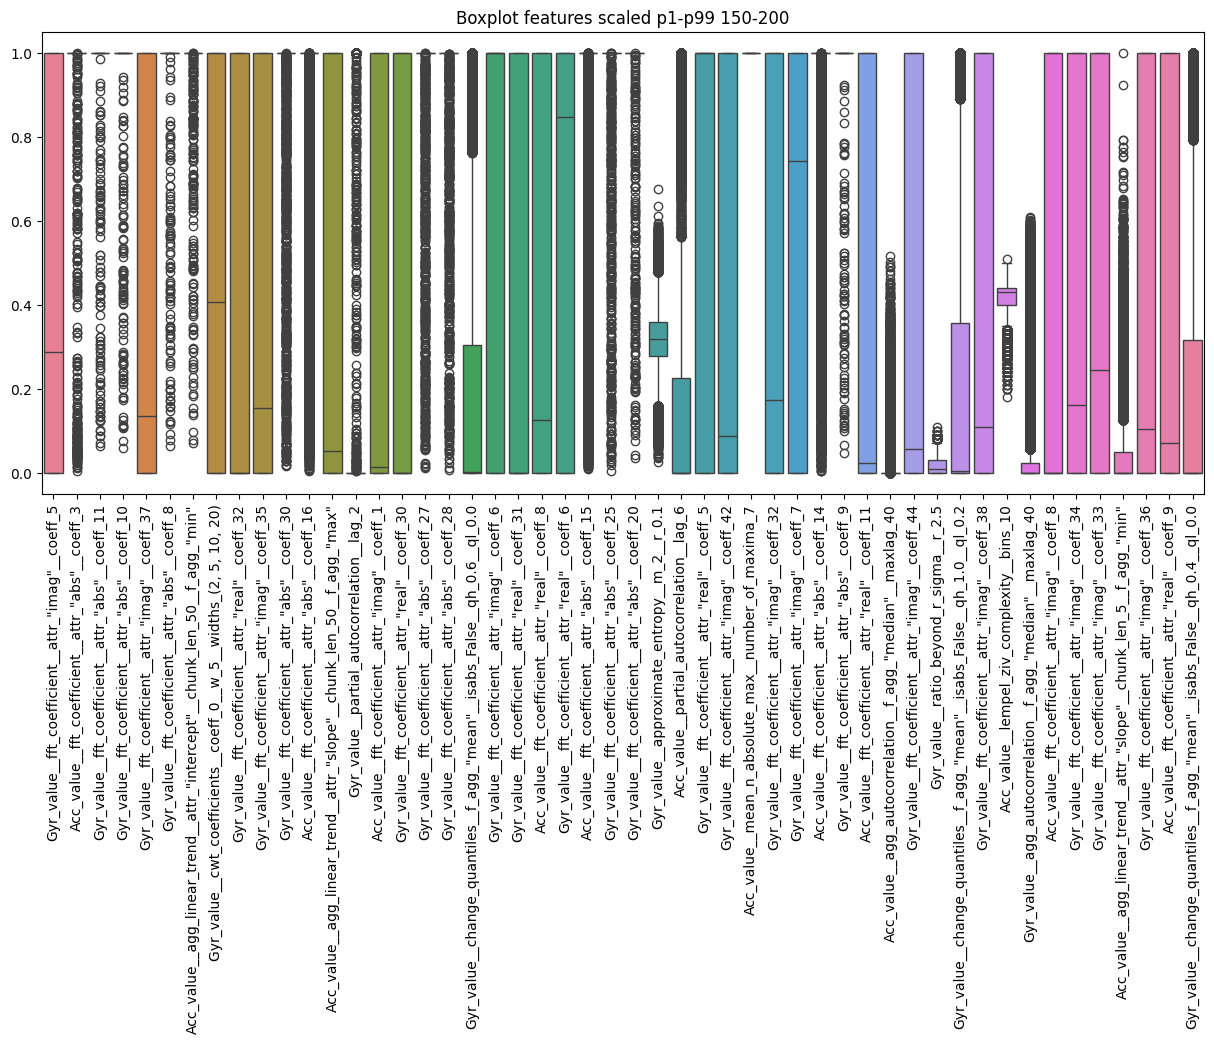

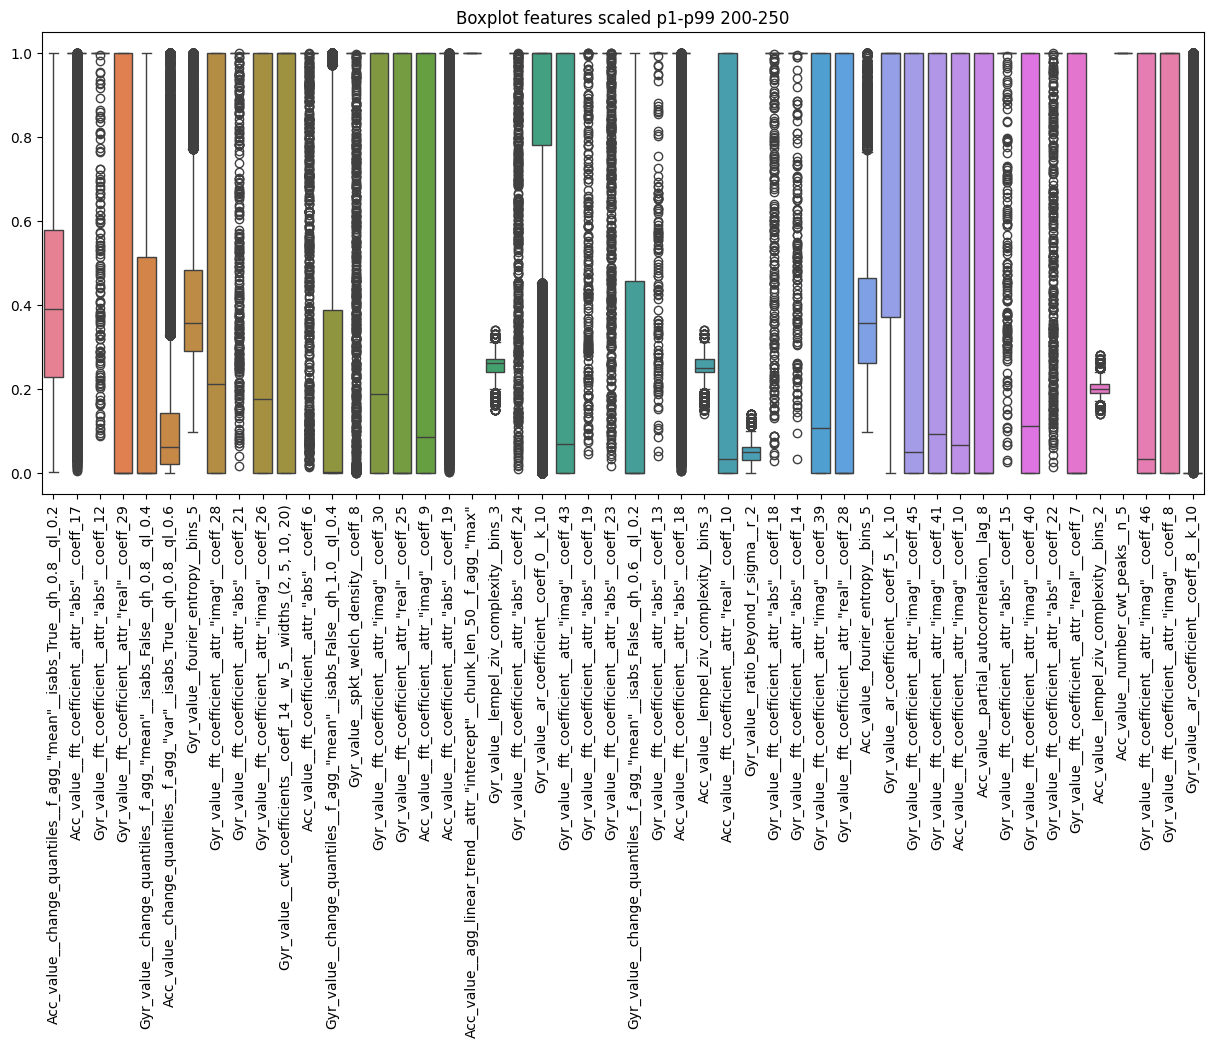

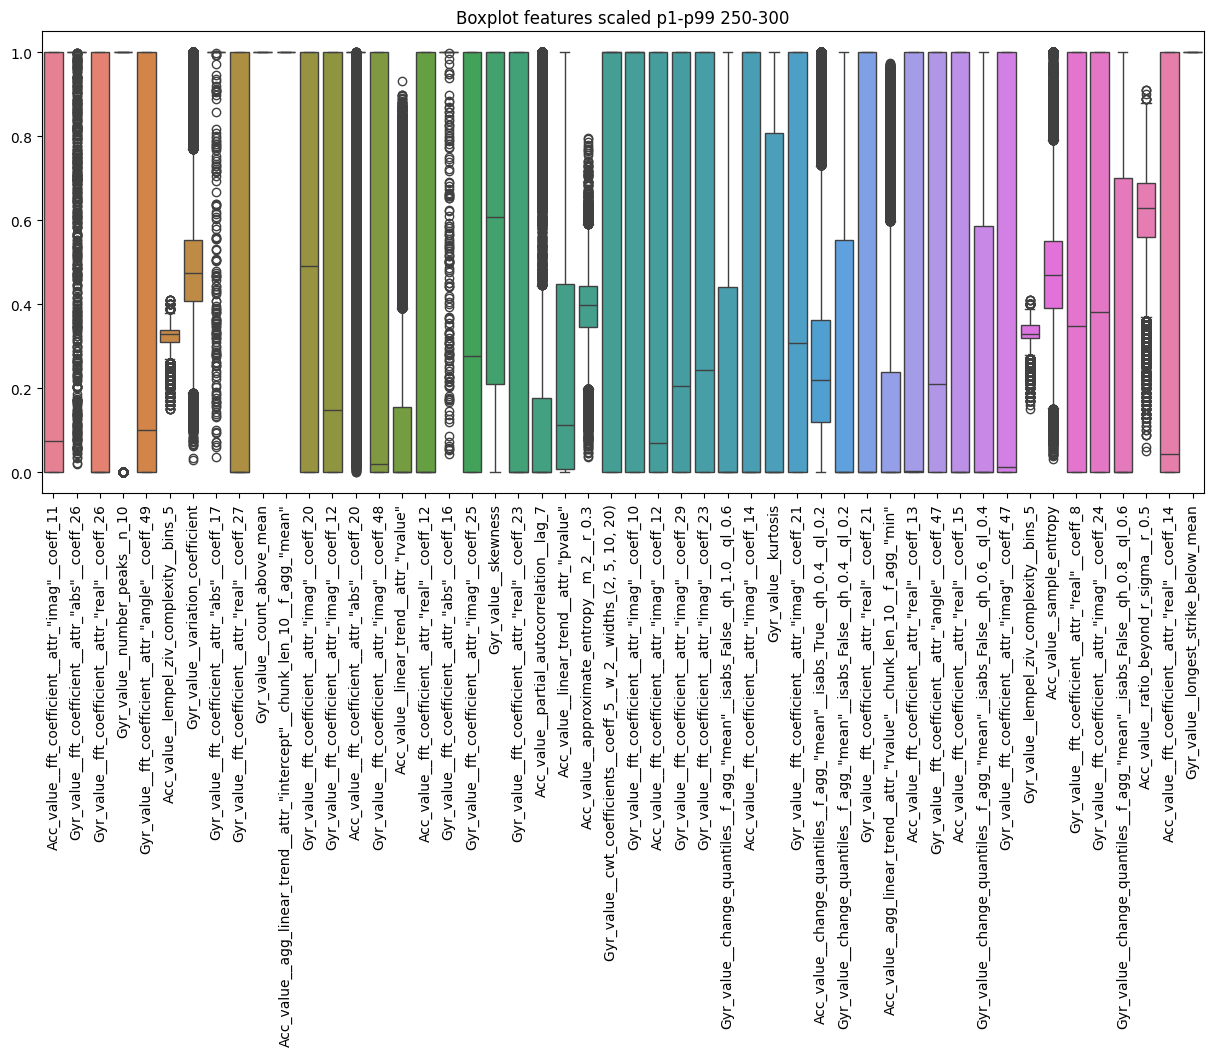

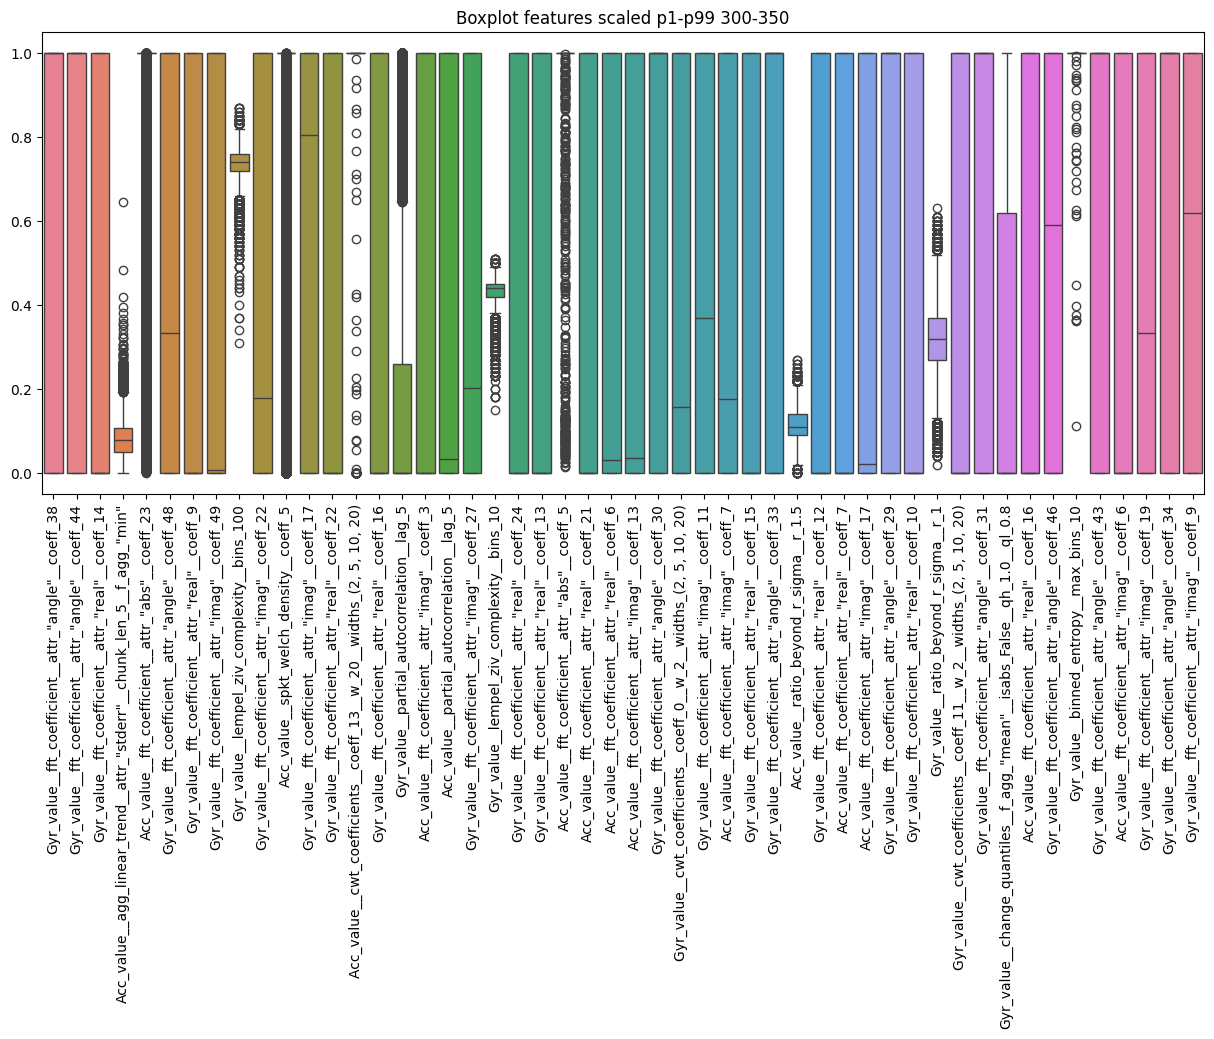

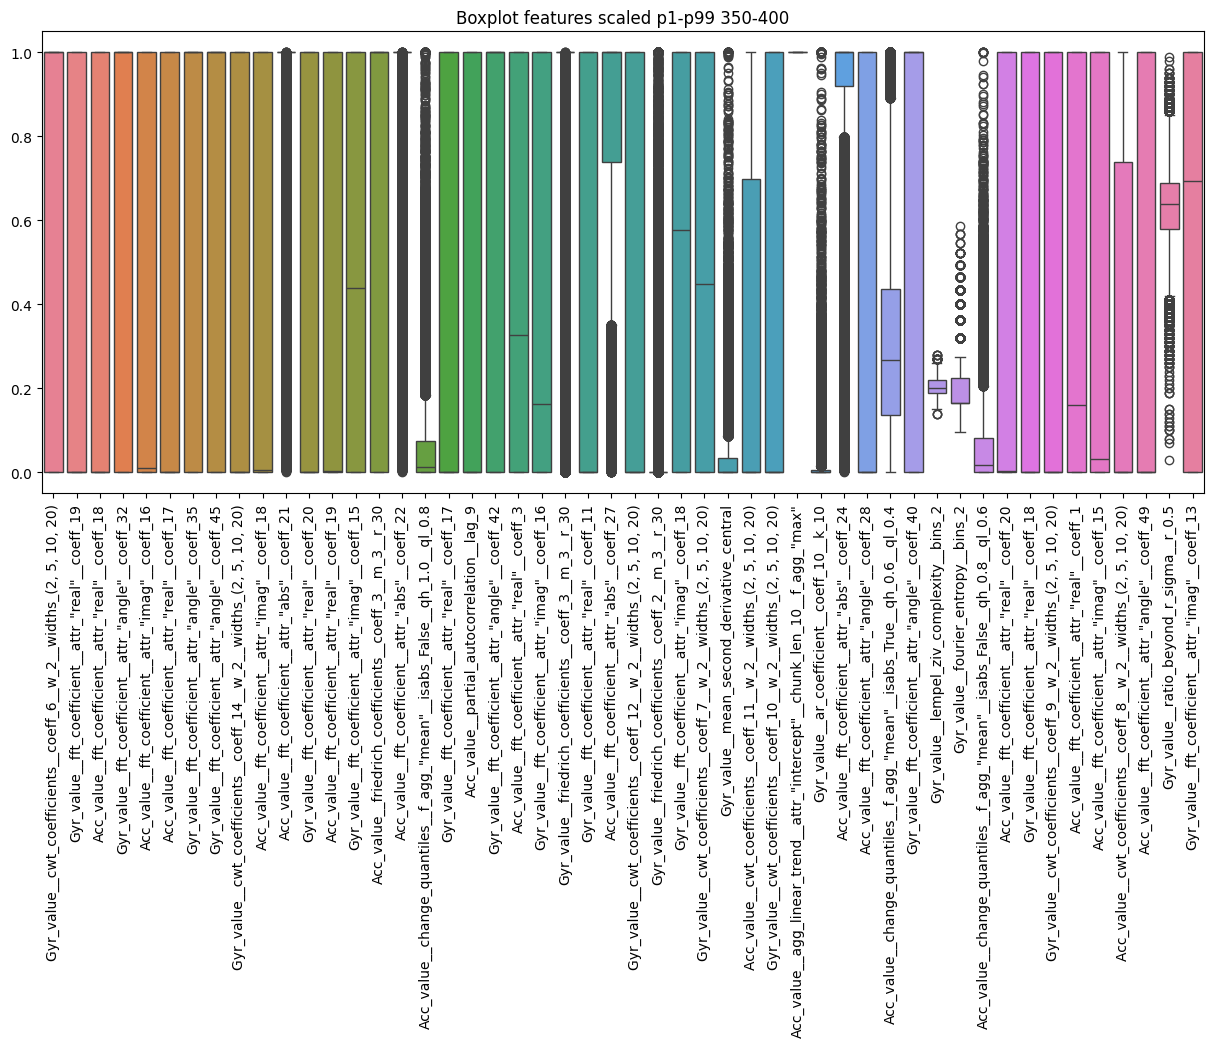

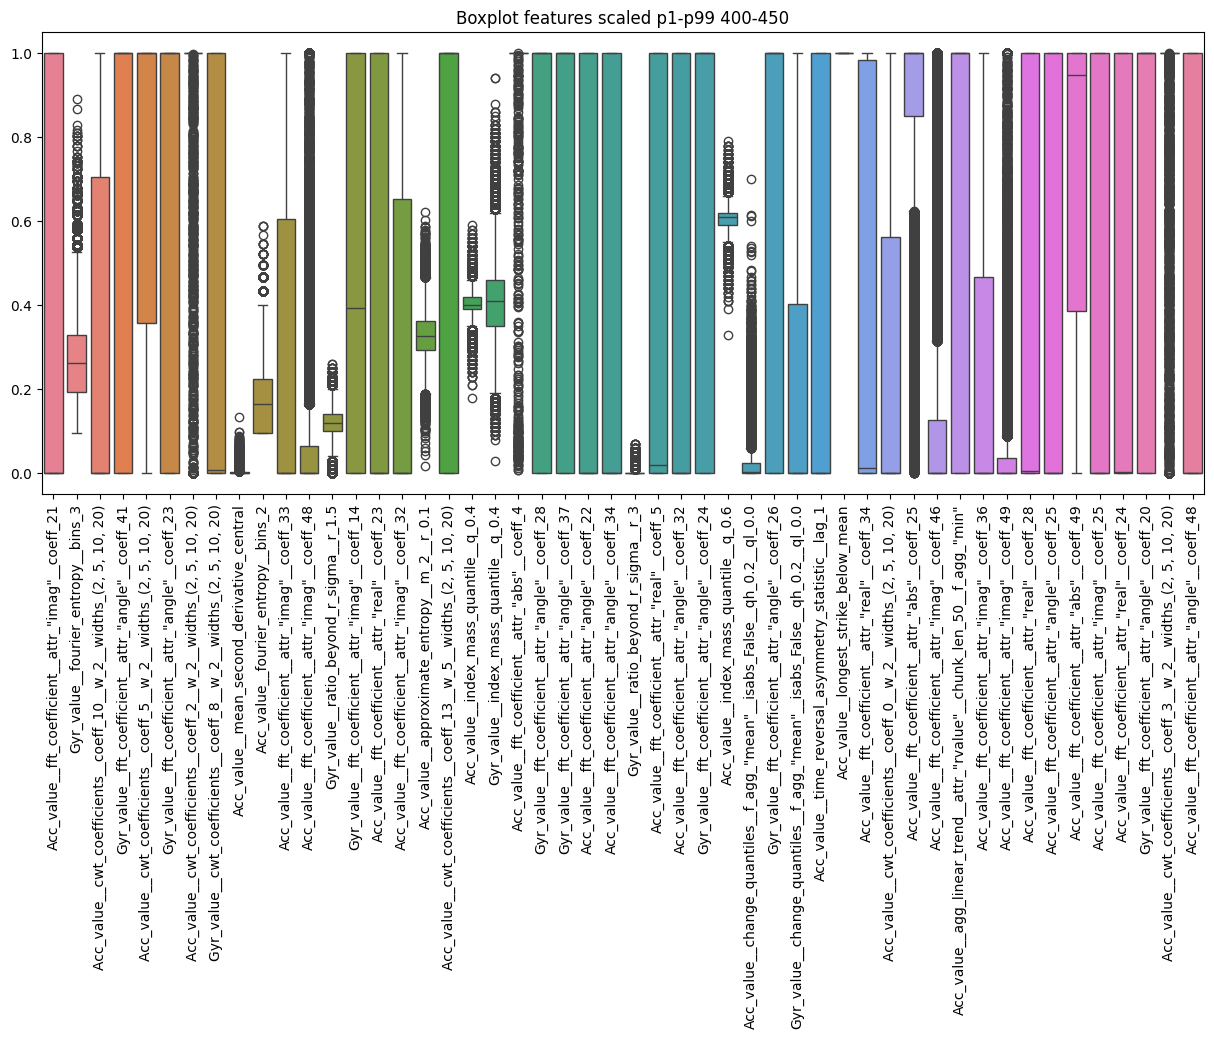

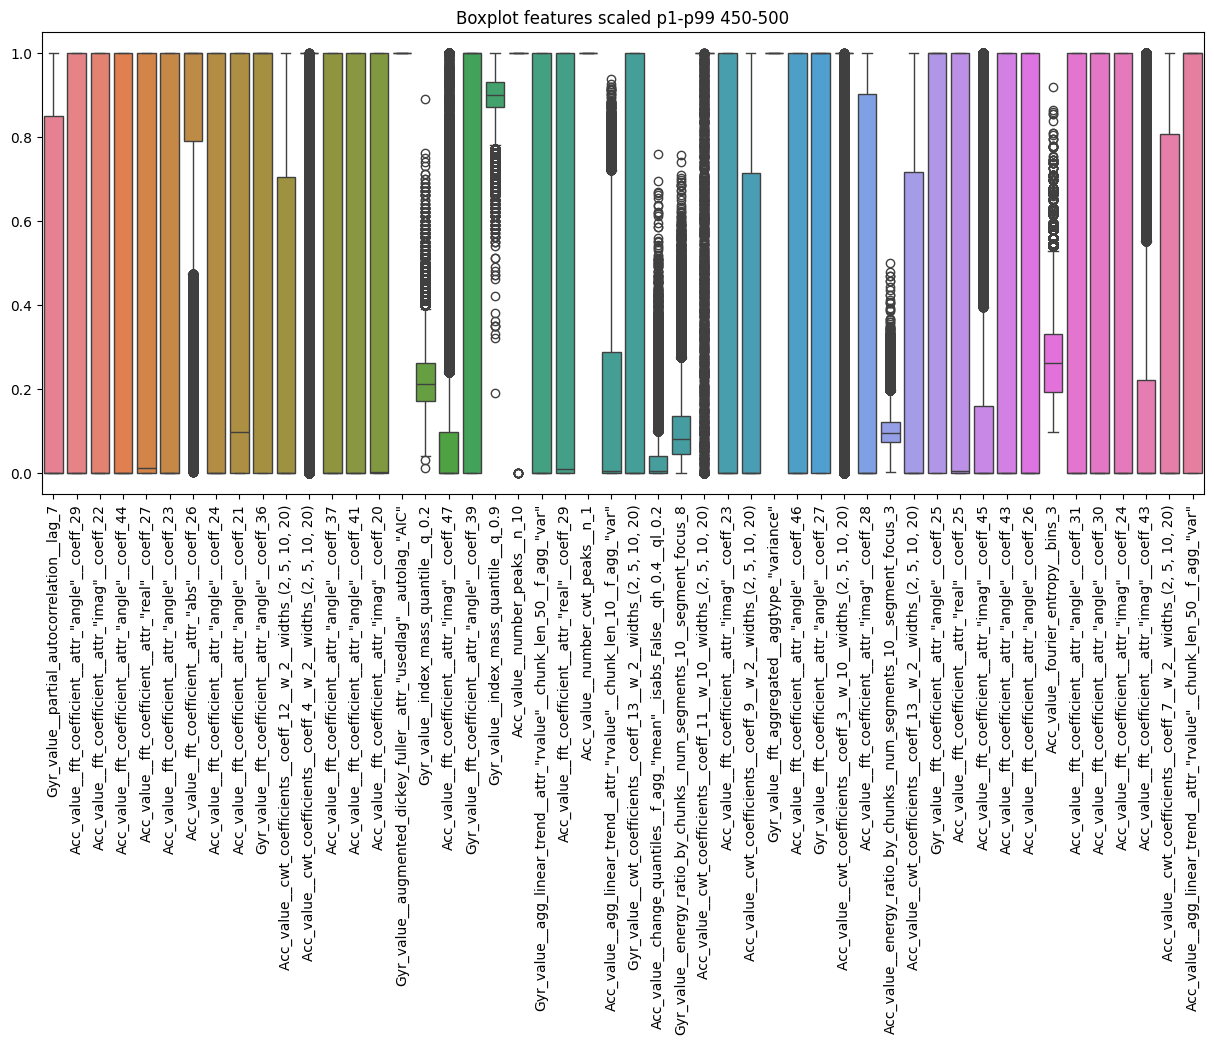

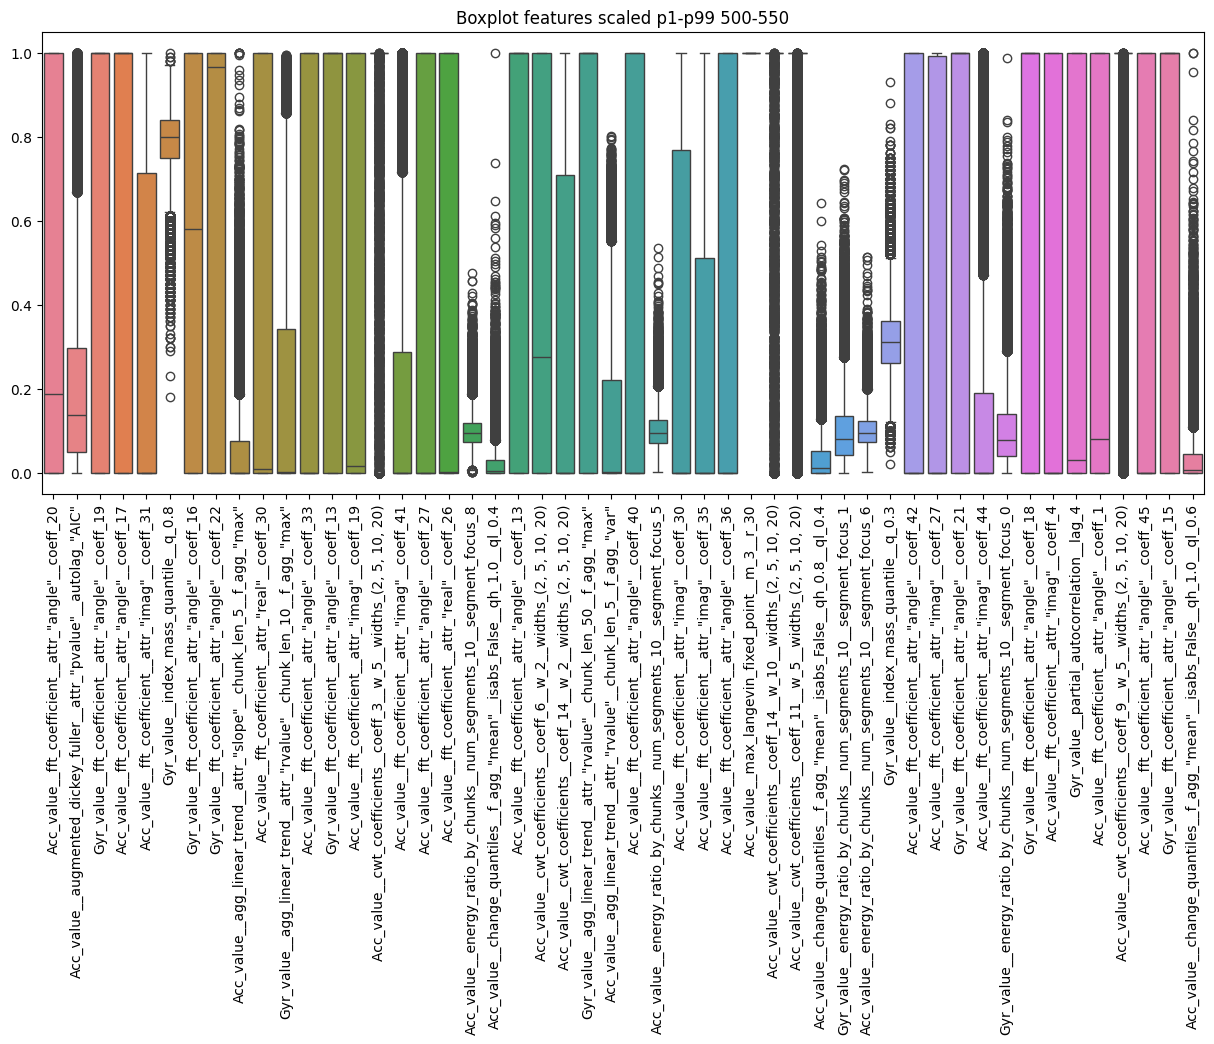

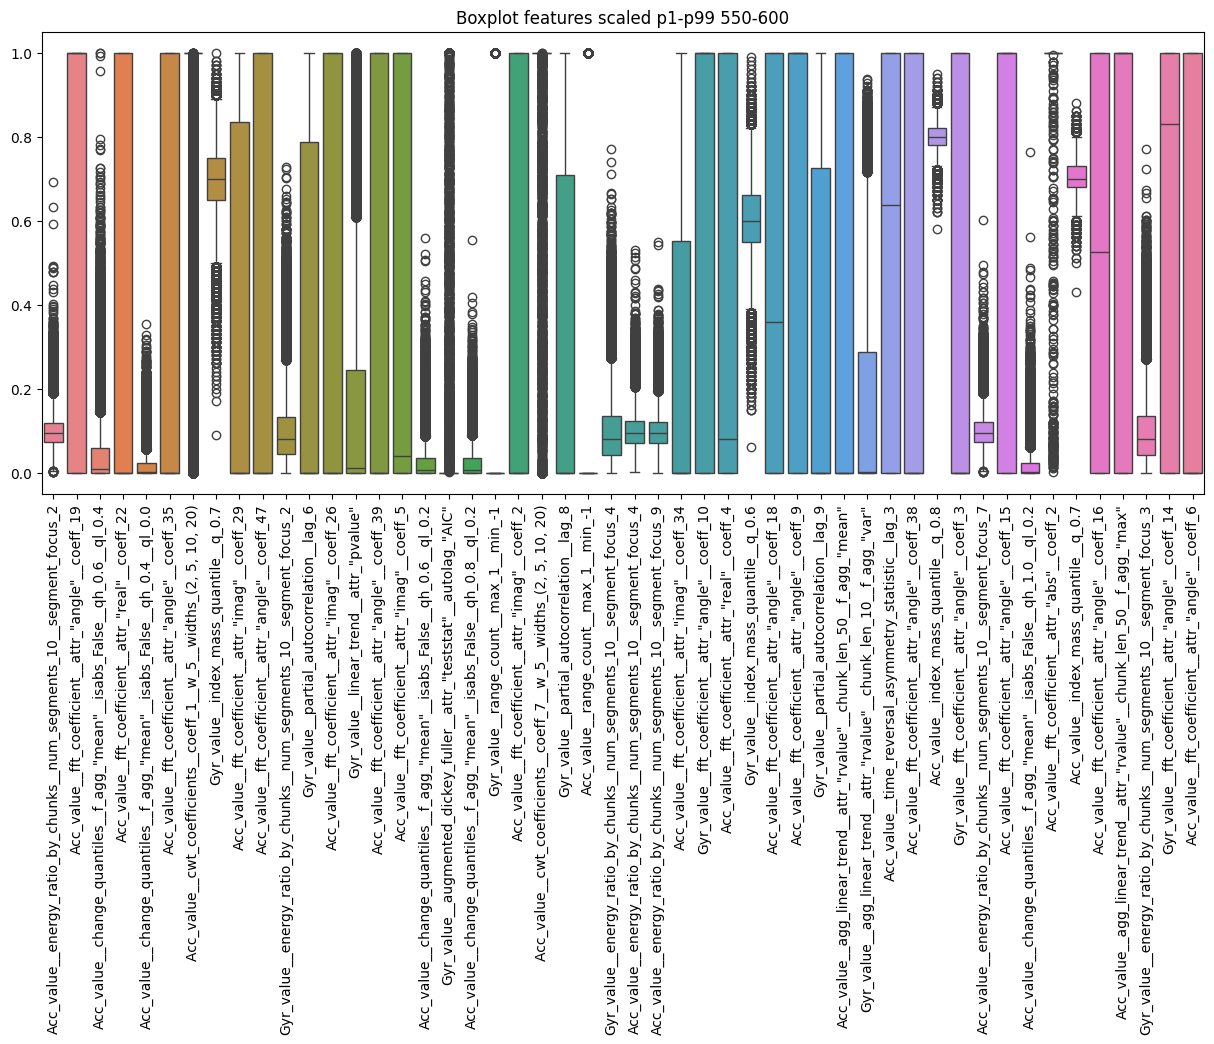

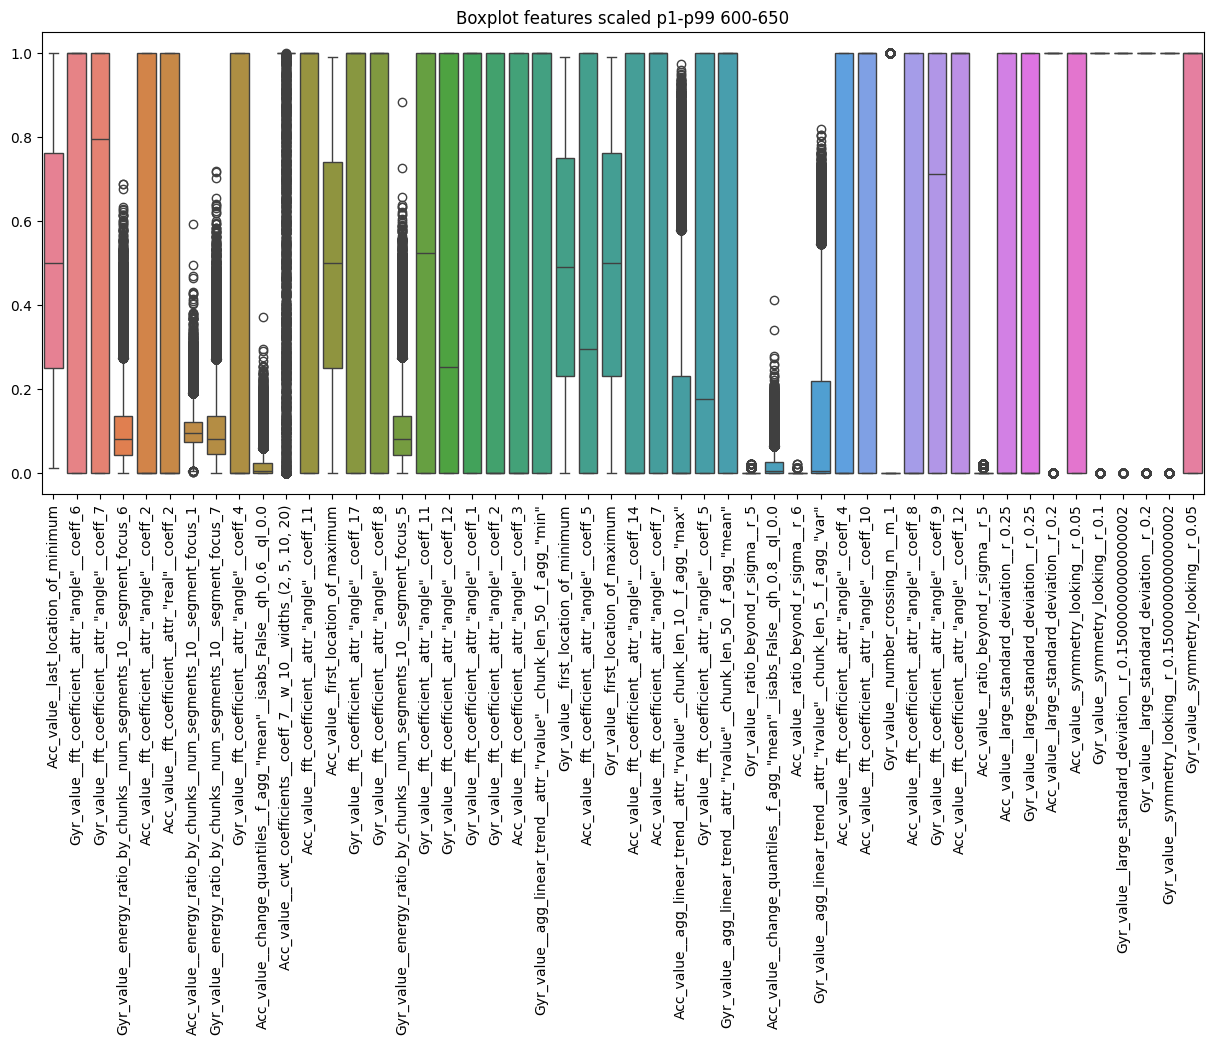

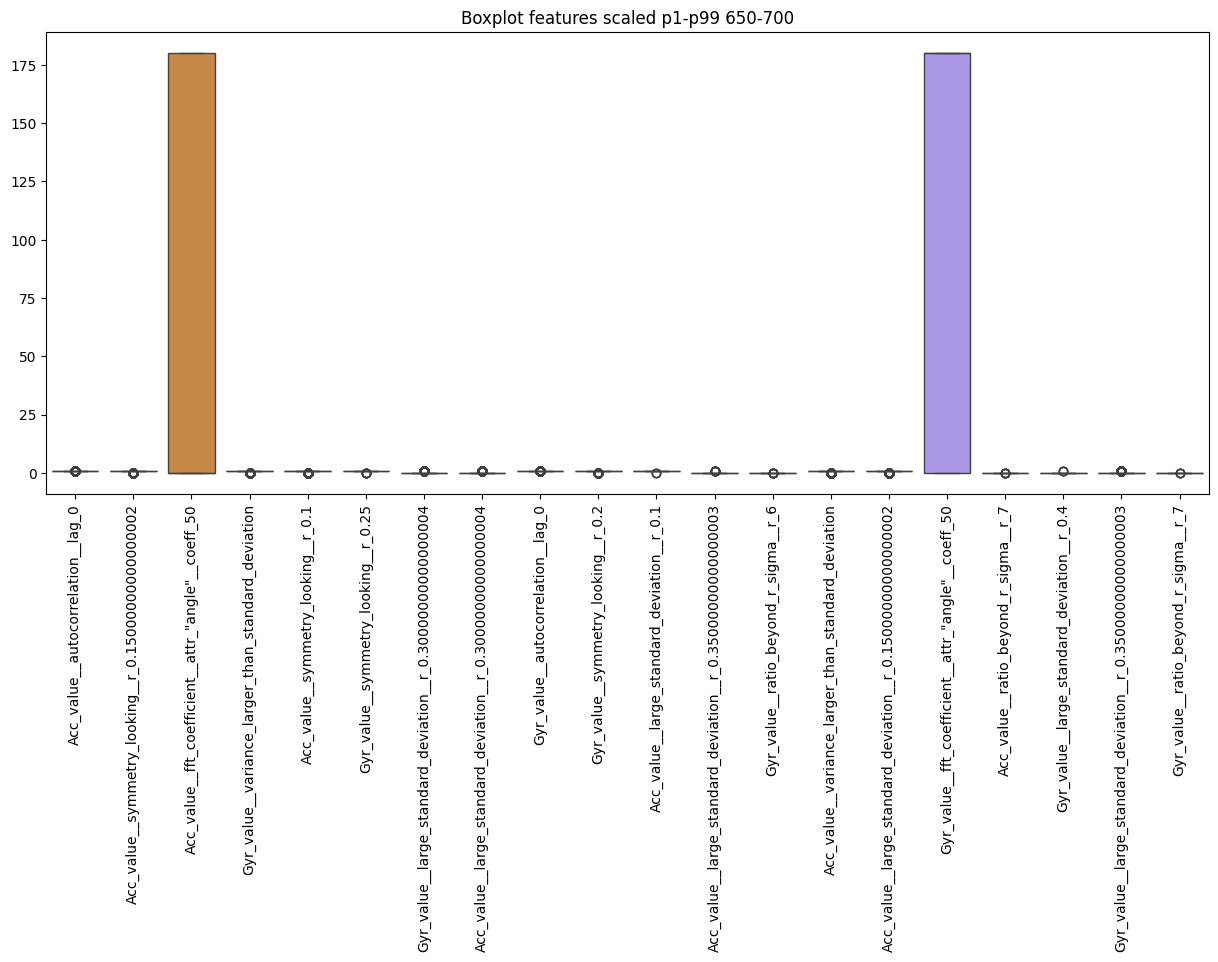

In [19]:
batch_size = 50
for i in range(0, features_scaled.shape[1], batch_size):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=features_scaled.iloc[:, i:i+batch_size])
    plt.title(f'Boxplot features scaled p1-p99 {i}-{i+batch_size}')
    plt.xticks(rotation=90)
    plt.show()

In [40]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

# 1. Identifica le feature con grande skewness
# Calcola lo skewness per ogni colonna
skewness = features_scaled.drop(["Subject", "Test", "Trial", "Bout", "Position"], axis=1).apply(skew, axis=0)

# Soglia per definire "grande skewness" (es. |skewness| > 1)
skewed_features = skewness[abs(skewness) > 1].index

print(f"Feature con grande skewness: {list(skewed_features)}")

# 2. Applica la trasformazione Box-Cox solo alle feature selezionate
transformer_boxcox = PowerTransformer(method='box-cox')

# Nota: Box-Cox richiede valori strettamente positivi, verifica che le feature siano tali
positive_skewed_features = [col for col in skewed_features if features_scaled.drop(["Subject", "Test", "Trial", "Bout", "Position"], axis=1)[col].min() > 0]

# Applica Box-Cox
features_scaled[positive_skewed_features] = transformer_boxcox.fit_transform(features_scaled[positive_skewed_features])

print(f"Trasformazione Box-Cox applicata a: {positive_skewed_features}")
print(f"Trasformazione Box-Cox applicata a {len(positive_skewed_features)} features.")

/Users/giorgio/Desktop/SmartphonePositioning/tf-venv/lib/python3.11/site-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


Feature con grande skewness: ['Gyr_value__c3__lag_3', 'Acc_value__cid_ce__normalize_True', 'Gyr_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"', 'Gyr_value__quantile__q_0.1', 'Acc_value__ar_coefficient__coeff_0__k_10', 'Gyr_value__permutation_entropy__dimension_4__tau_1', 'Gyr_value__fft_coefficient__attr_"abs"__coeff_1', 'Gyr_value__max_langevin_fixed_point__m_3__r_30', 'Gyr_value__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"max"', 'Gyr_value__fft_coefficient__attr_"abs"__coeff_2', 'Acc_value__ar_coefficient__coeff_5__k_10', 'Gyr_value__number_peaks__n_3', 'Gyr_value__spkt_welch_density__coeff_2', 'Gyr_value__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"var"', 'Acc_value__partial_autocorrelation__lag_1', 'Gyr_value__friedrich_coefficients__coeff_0__m_3__r_30', 'Acc_value__fourier_entropy__bins_100', 'Gyr_value__fft_coefficient__attr_"abs"__coeff_3', 'Gyr_value__minimum', 'Gyr_value__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min

In [43]:
from sklearn.preprocessing import StandardScaler

# Inizializza lo scaler
scaler = StandardScaler()

# Seleziona solo le feature numeriche, escludendo i metadati
features_numerical = features_scaled.drop(columns=["Subject", "Test", "Trial", "Bout", "Position"])

# Applica la standardizzazione mantenendo l'indice
features_standardized = pd.DataFrame(
    scaler.fit_transform(features_numerical), 
    columns=features_numerical.columns, 
    index=features_numerical.index  # Mantiene l'indice originale
)

# Concatena i metadati mantenendo l'ordine
features_standardized_df = pd.concat([
    features_scaled[["Subject", "Test", "Trial", "Bout", "Position"]], 
    features_standardized
], axis=1)

# Verifica il numero di righe
print(f"Righe in features_scaled: {features_scaled.shape[0]}")
print(f"Righe in features_standardized: {features_standardized.shape[0]}")
print(f"Righe in features_standardized_df dopo concat: {features_standardized_df.shape[0]}")


Righe in features_scaled: 126111
Righe in features_standardized: 126111
Righe in features_standardized_df dopo concat: 126111


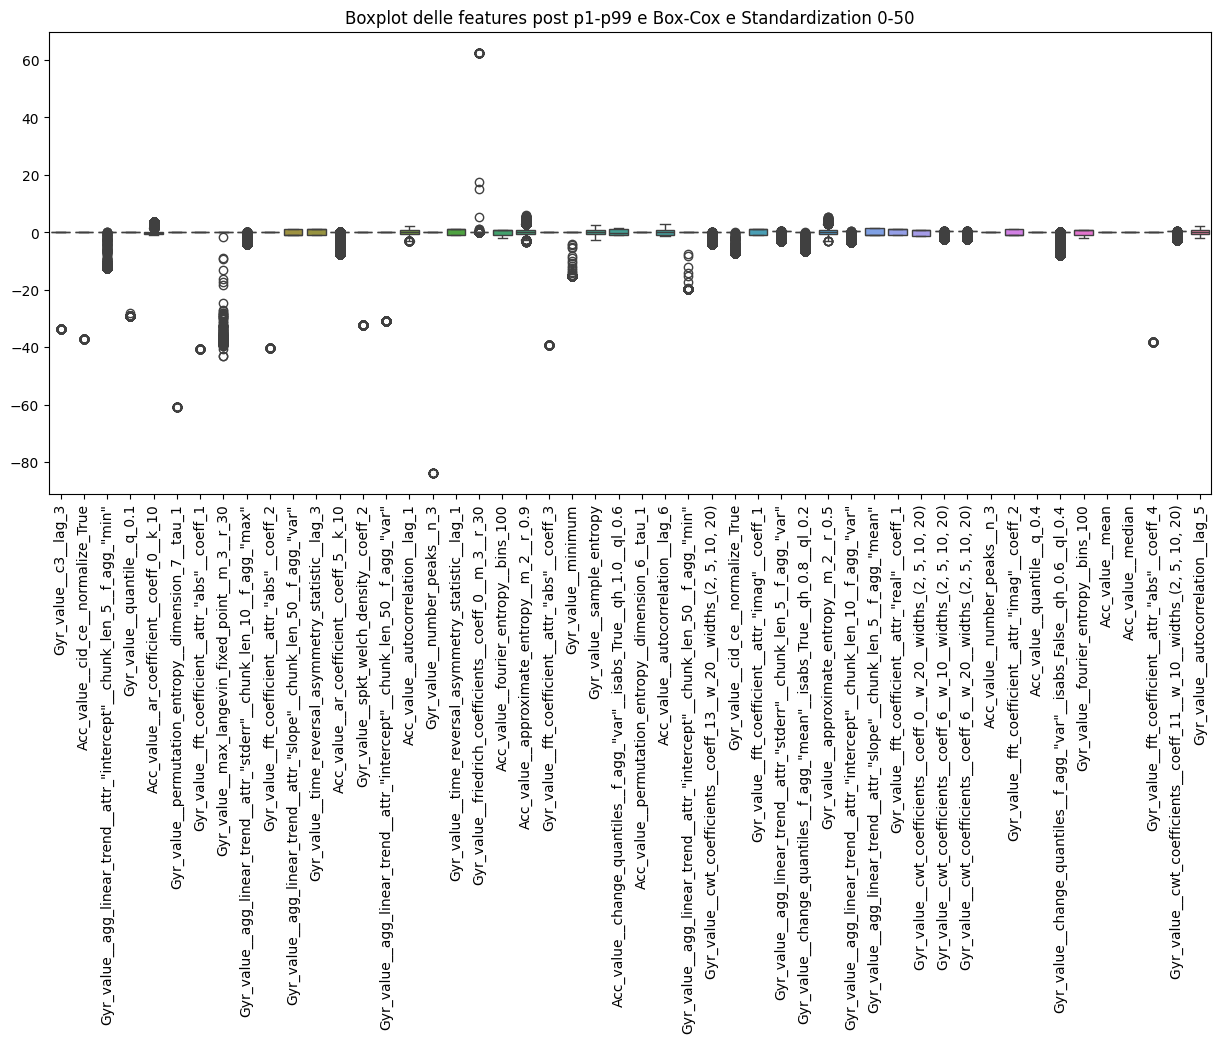

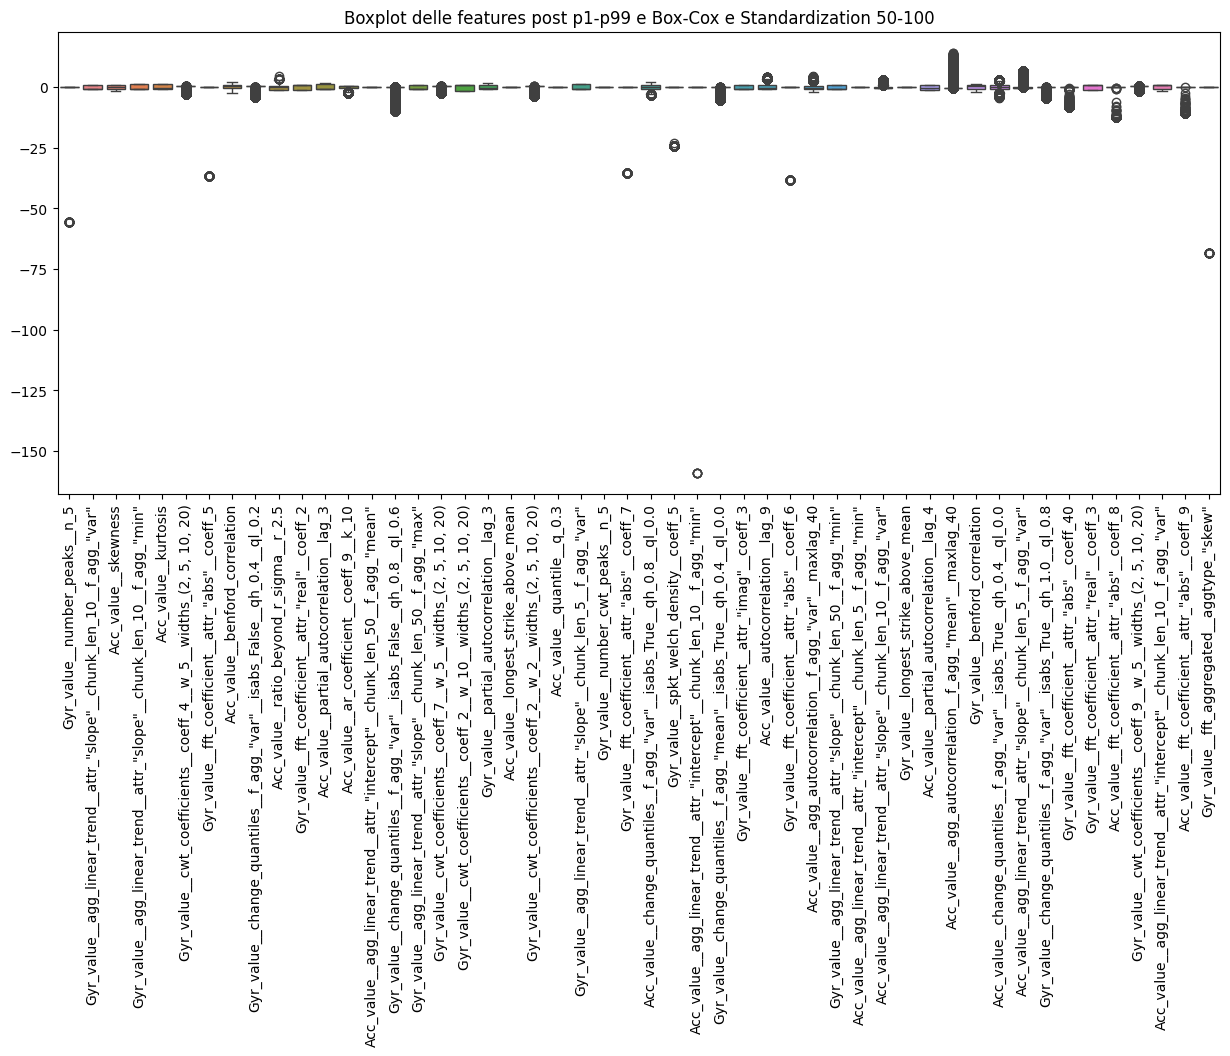

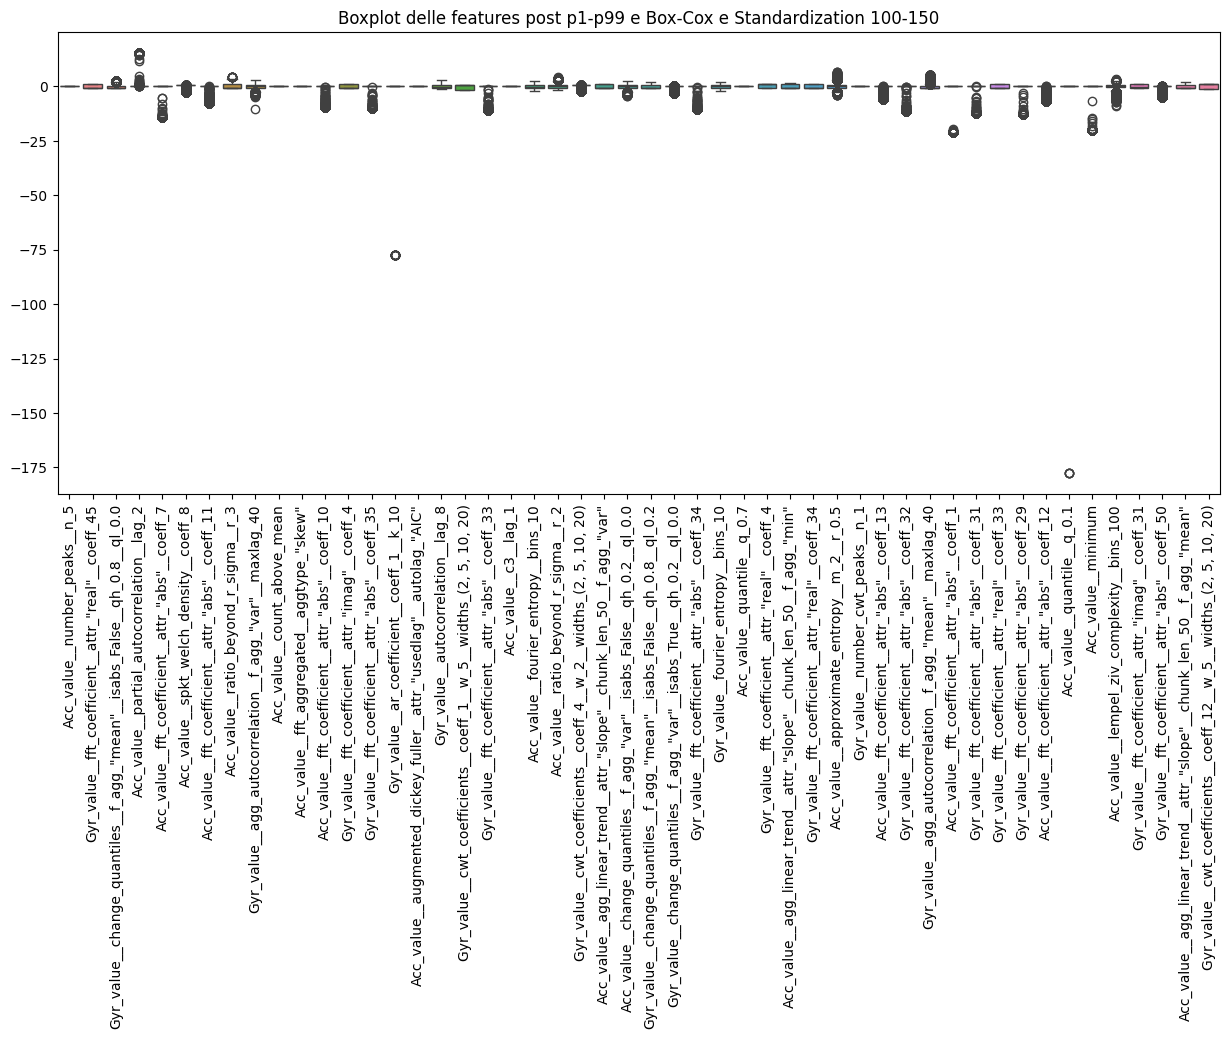

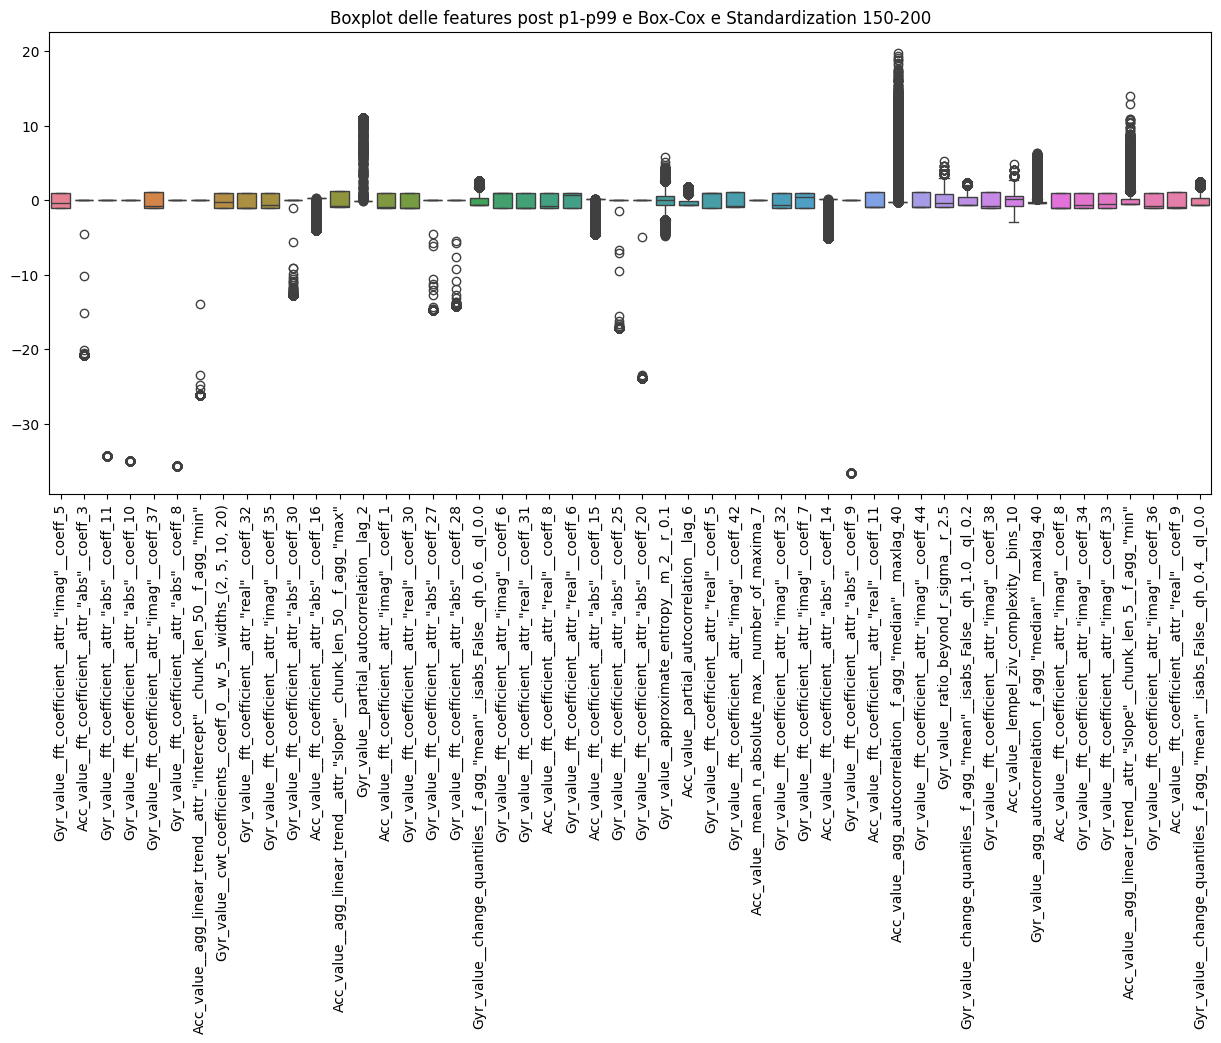

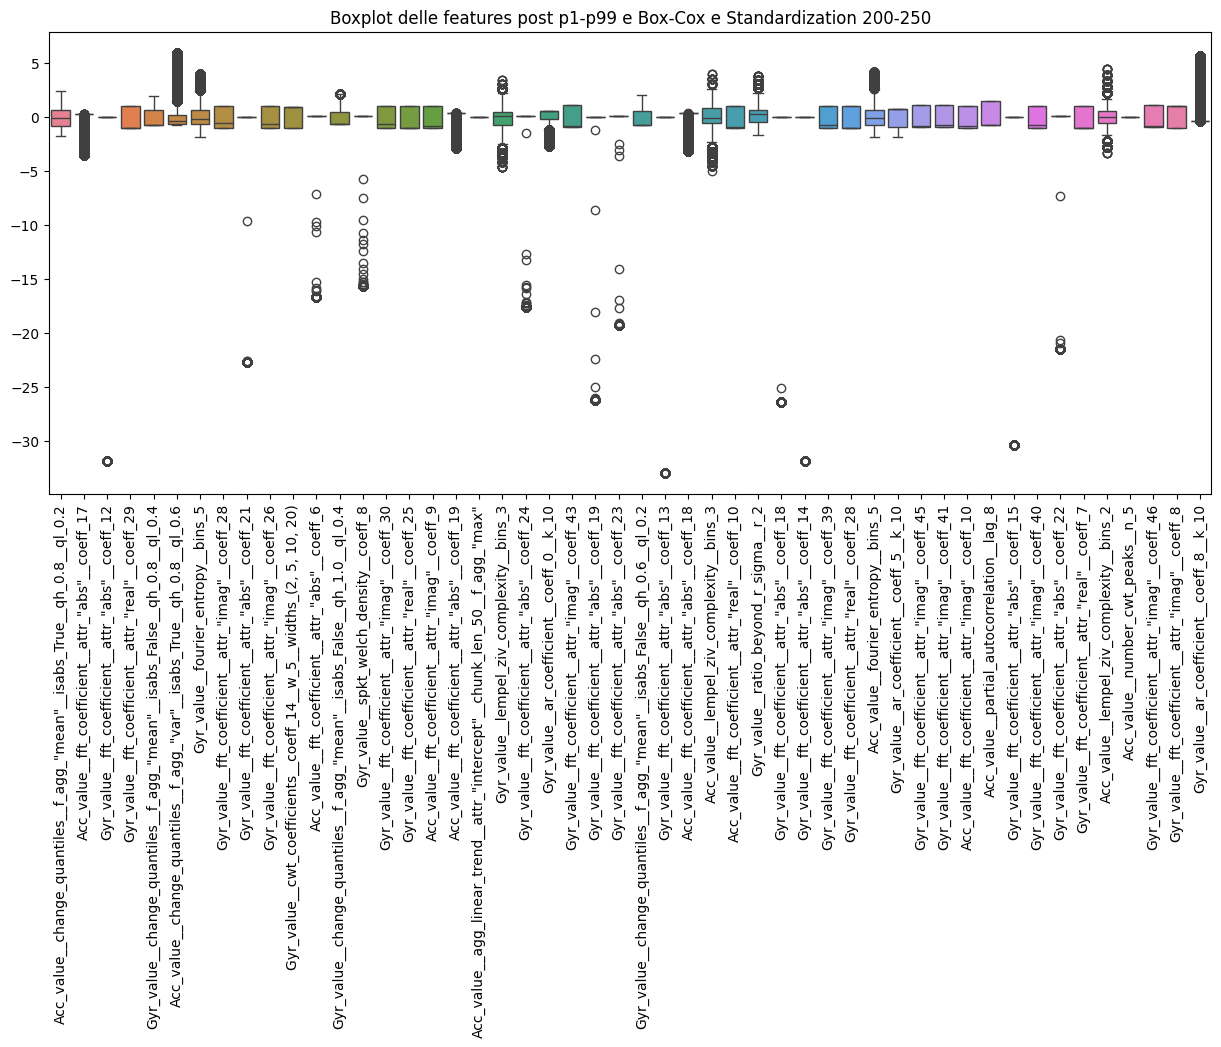

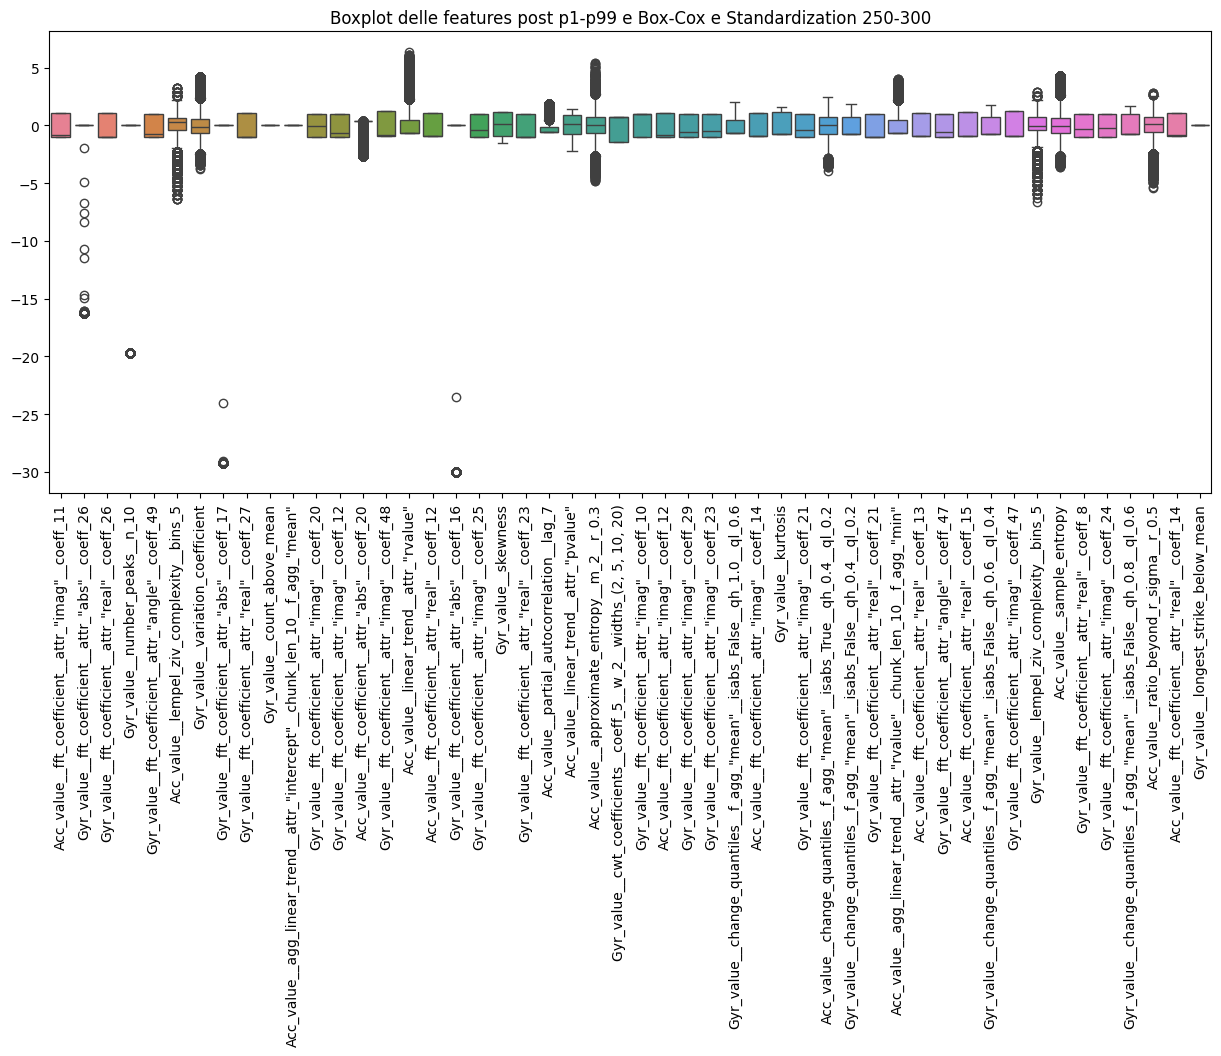

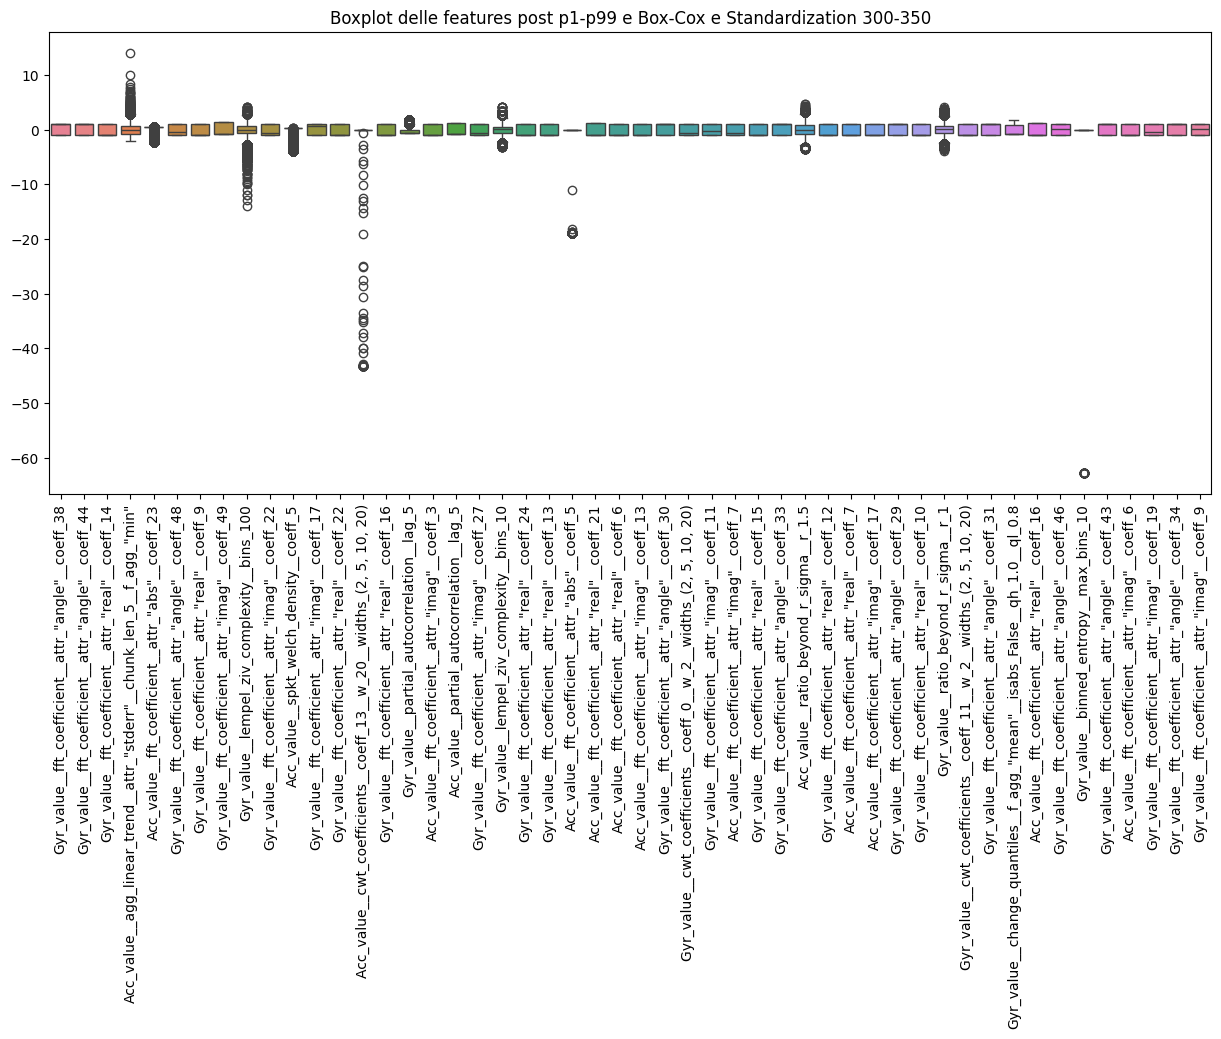

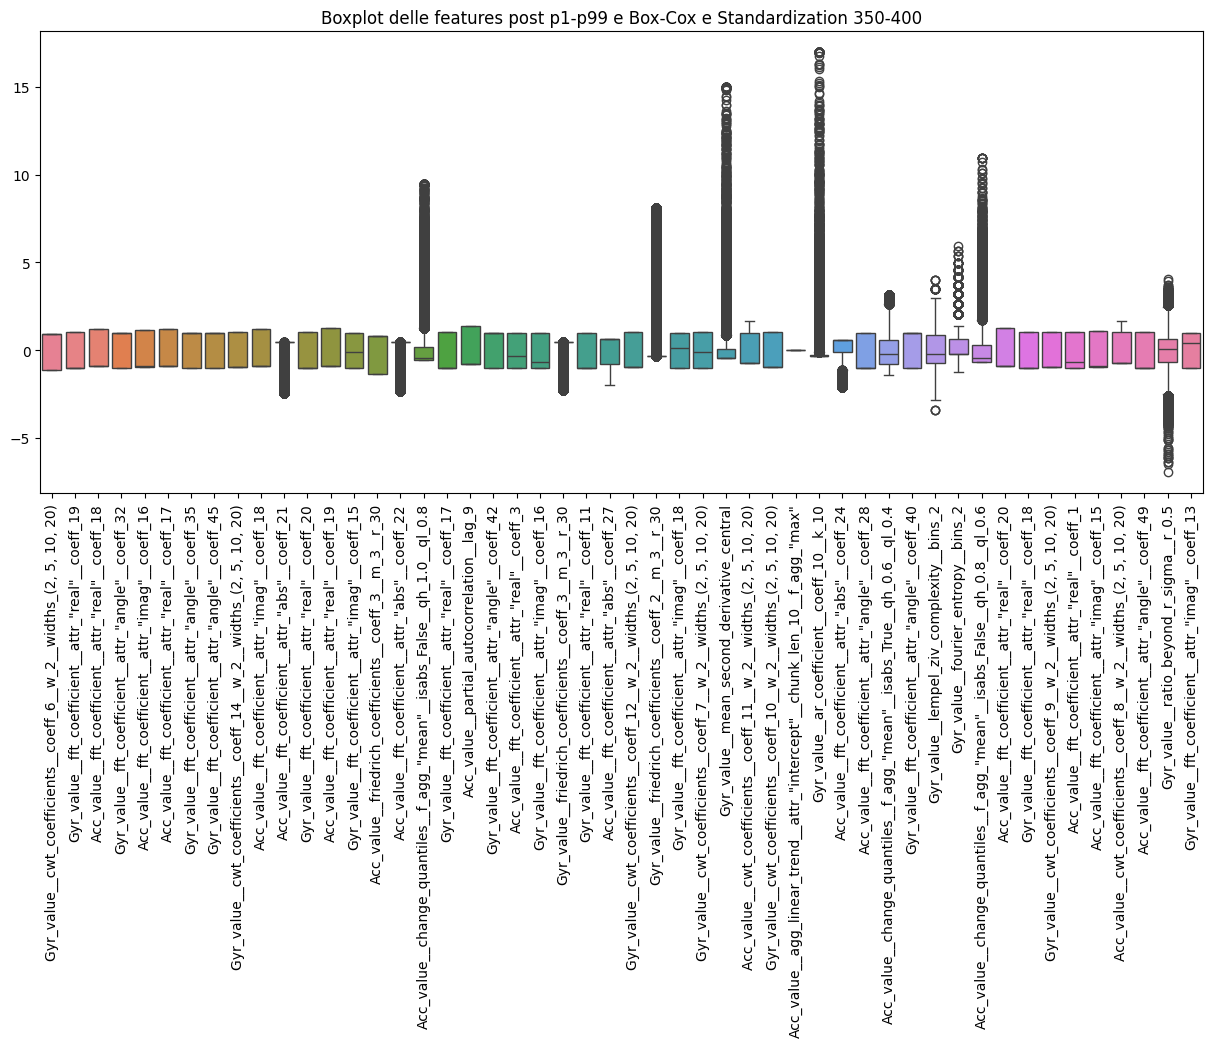

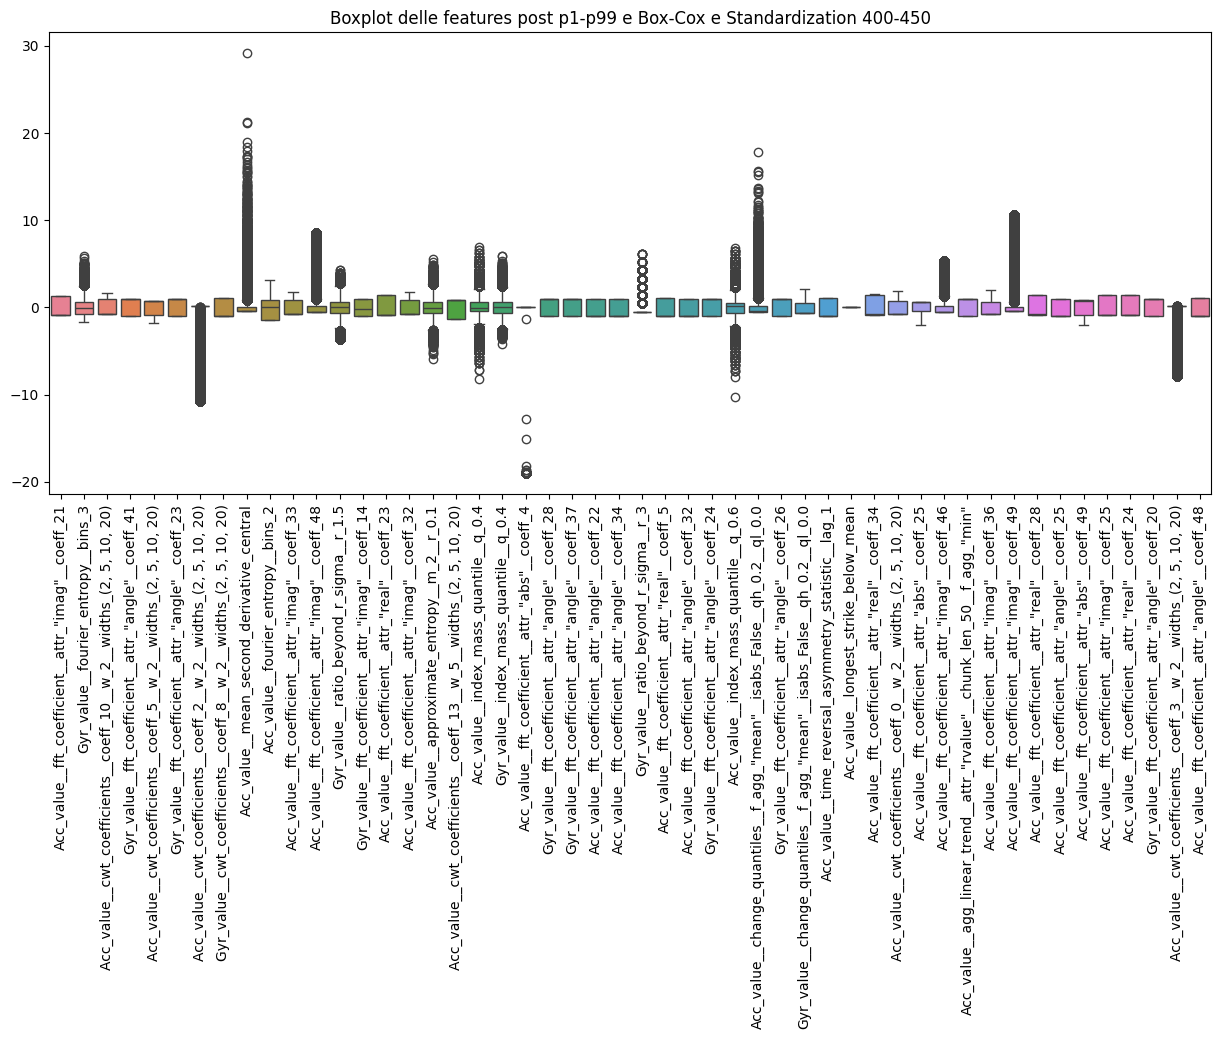

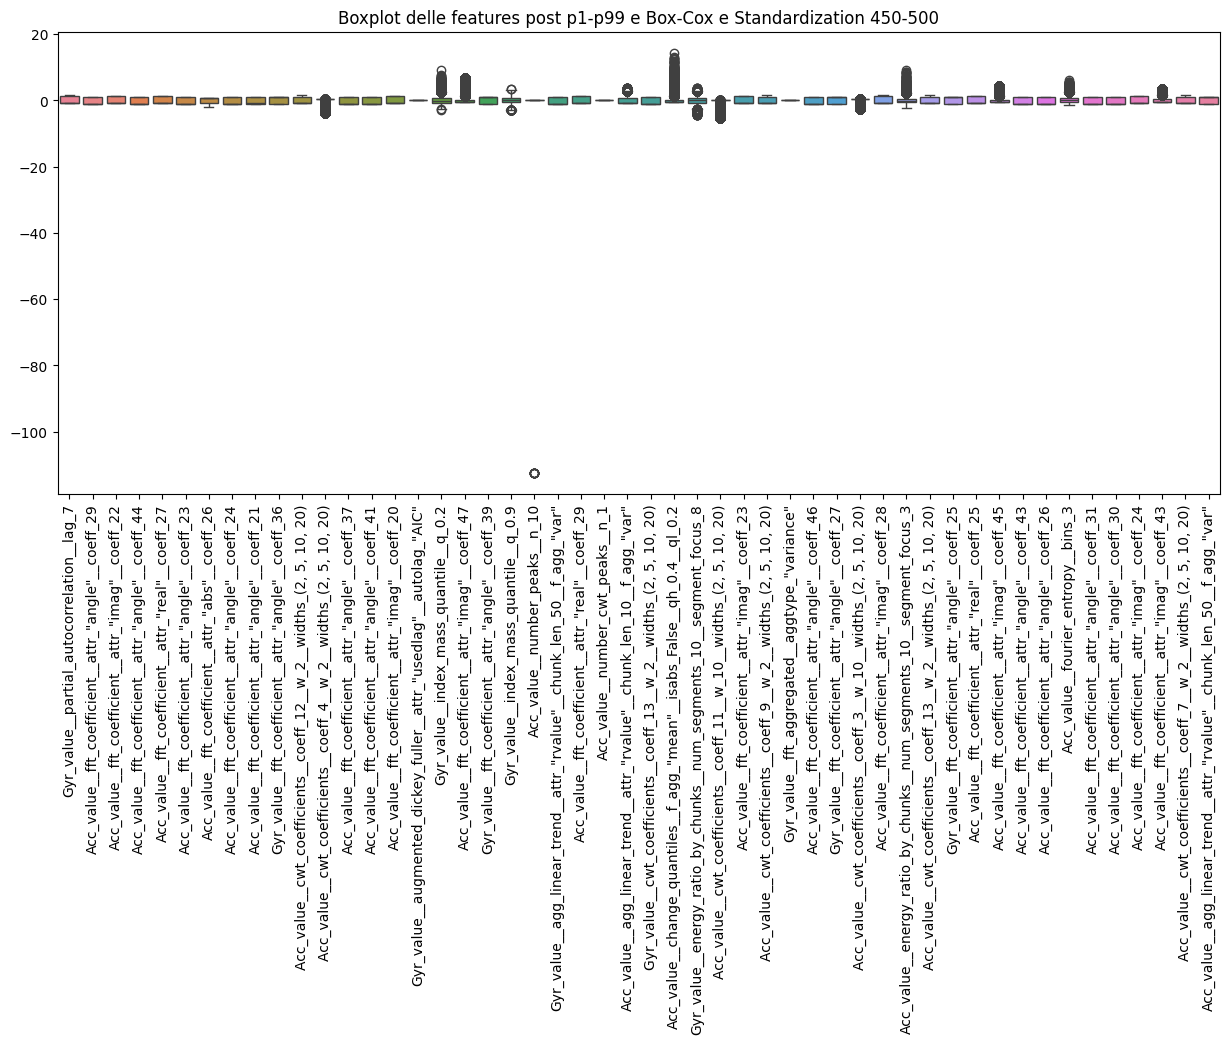

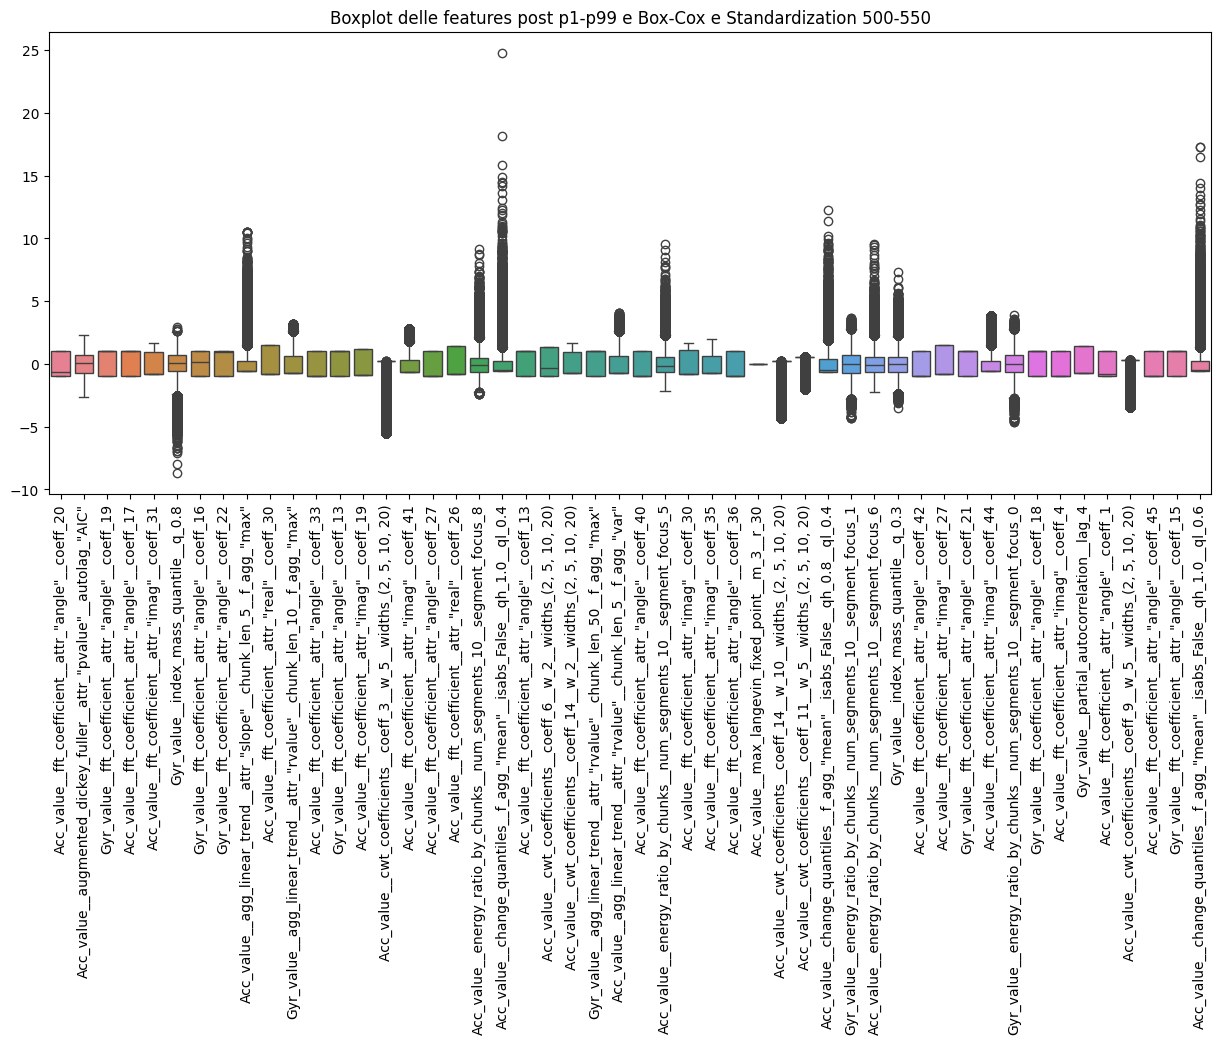

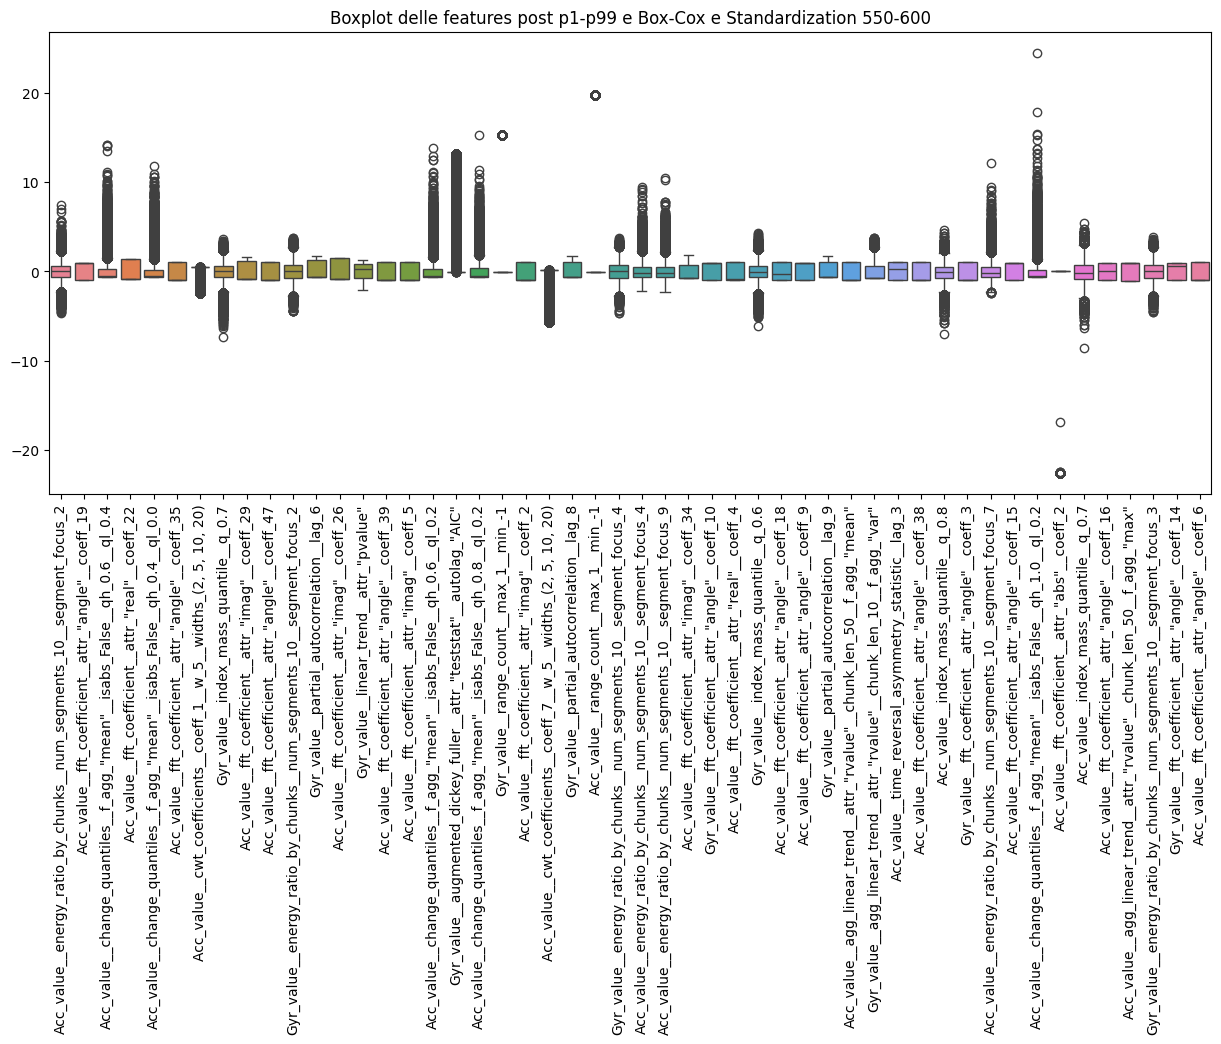

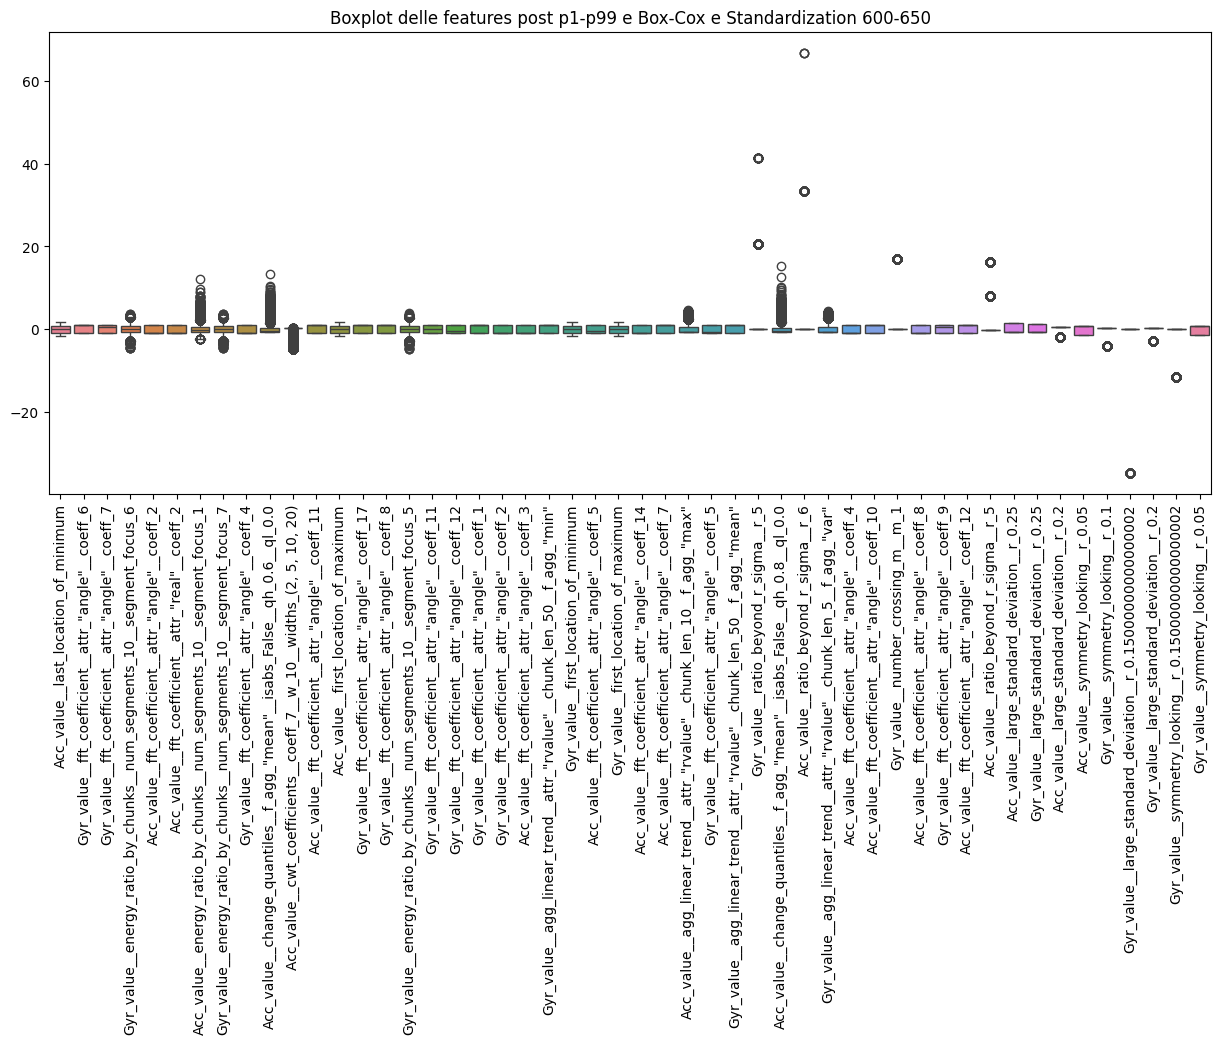

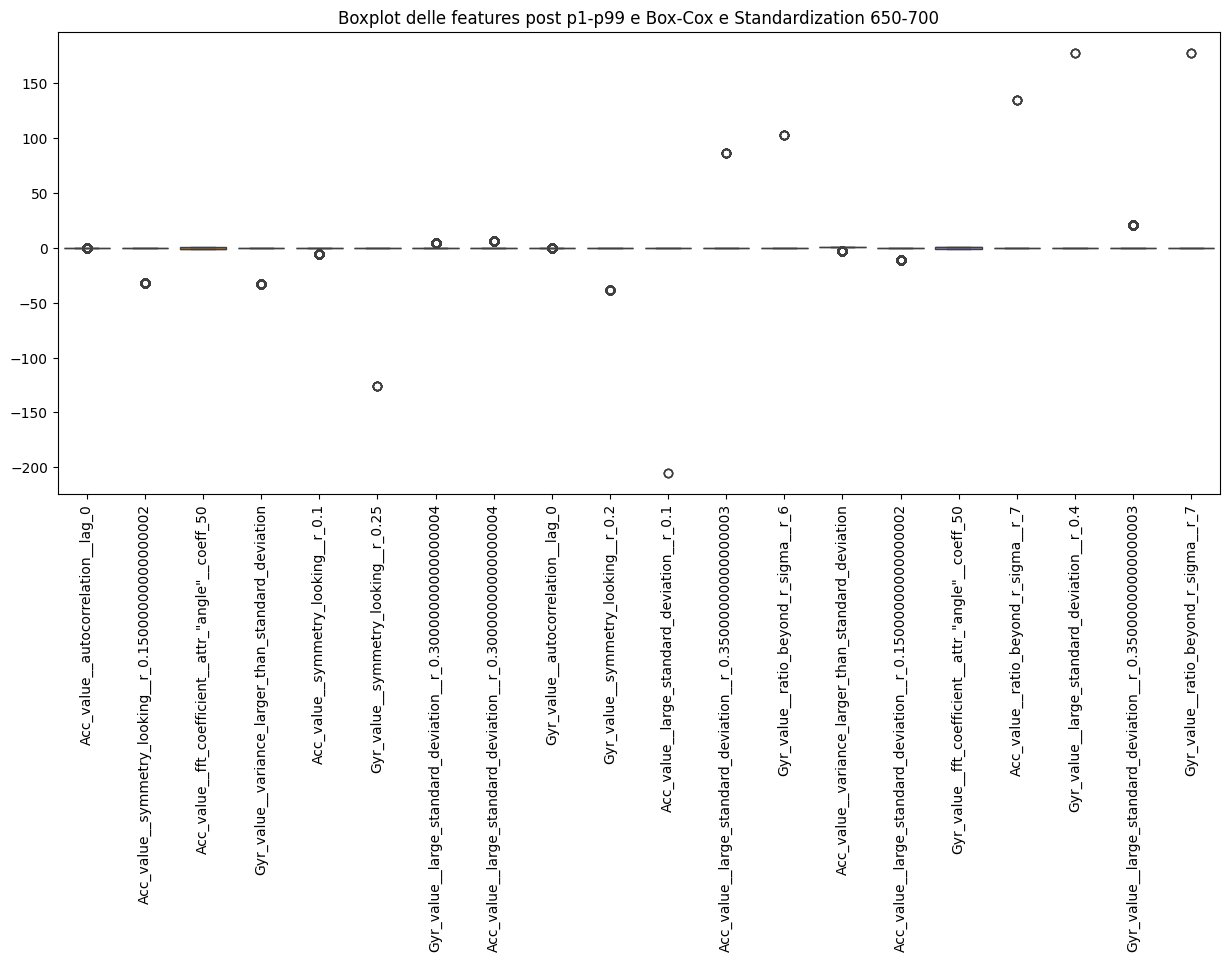

In [22]:
batch_size = 50
for i in range(0, features_standardized.shape[1], batch_size):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=features_standardized.iloc[:, i:i+batch_size])
    plt.title(f'Boxplot delle features post p1-p99 e Box-Cox e Standardization {i}-{i+batch_size}')
    plt.xticks(rotation=90)
    plt.show()

In [44]:
# Calcolo dei limiti di clipping per ciascuna feature
lower_bound = features_standardized.mean() - 3 * features_standardized.std()
upper_bound = features_standardized.mean() + 3 * features_standardized.std()

# Applica il clipping ai valori oltre ±3 deviazioni standard
features_clipped = features_standardized.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [24]:
batch_size = 50
for i in range(0, features_clipped.shape[1], batch_size):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=features_clipped.iloc[:, i:i+batch_size])
    plt.title(f'Boxplot features with outlier clipped to 3std {i}-{i+batch_size}')
    plt.xticks(rotation=90)
    plt.show()

KeyboardInterrupt: 

<Figure size 1500x600 with 0 Axes>

Gyr_value__c3__lag_3                                                       0.087225
Acc_value__cid_ce__normalize_True                                          0.072952
Gyr_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"    0.666873
Gyr_value__quantile__q_0.1                                                 0.118150
Acc_value__ar_coefficient__coeff_0__k_10                                   3.144849
                                                                             ...   
Gyr_value__fft_coefficient__attr_"angle"__coeff_9                          0.000000
Acc_value__ratio_beyond_r_sigma__r_5                                       0.943613
Gyr_value__number_crossing_m__m_1                                          0.348106
Acc_value__fft_coefficient__attr_"angle"__coeff_12                         0.000000
Acc_value__fft_coefficient__attr_"angle"__coeff_10                         0.000000
Length: 641, dtype: float64


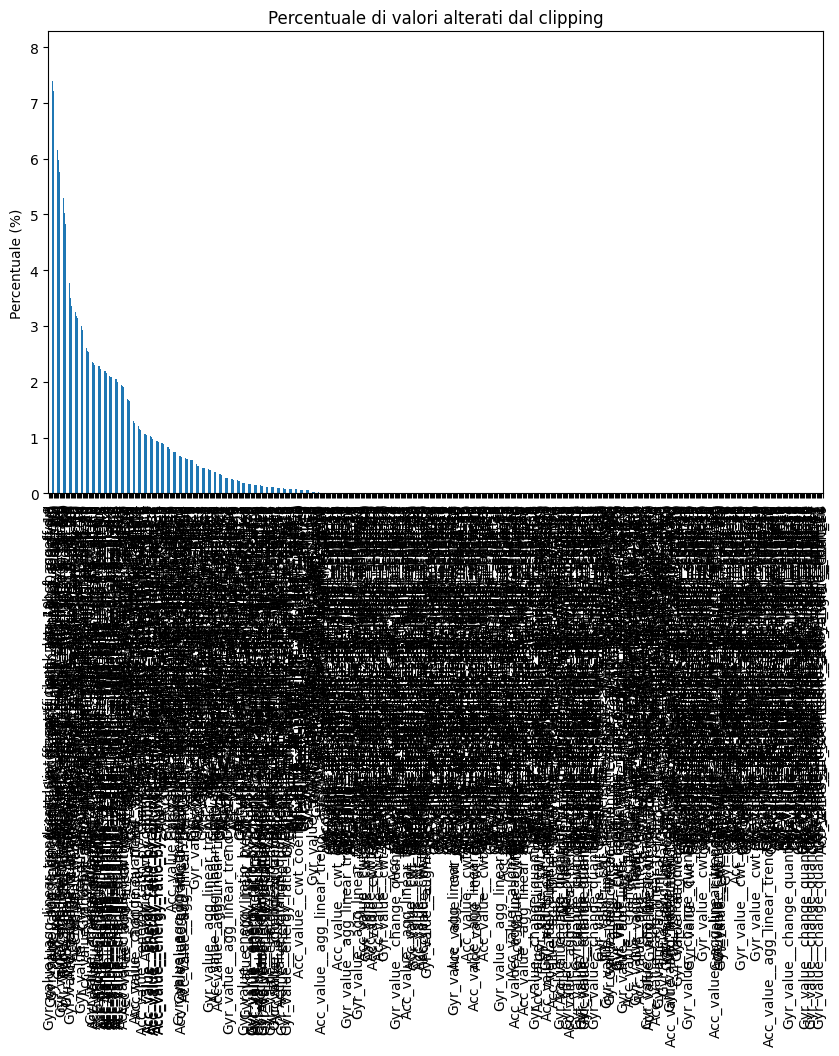

In [30]:
# Percentuale di valori alterati per ogni feature
altered_values = (features_standardized != features_clipped).sum()
percentage_altered = (altered_values / len(features)) * 100
print(percentage_altered)

# Visualizza le feature più influenzate
percentage_altered.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Percentuale di valori alterati dal clipping")
plt.ylabel("Percentuale (%)")
plt.show()

In [45]:
features_clipped_df = pd.concat([features_standardized_df[["Subject", "Test", "Trial", "Bout", "Position"]], features_clipped], axis=1)

In [46]:
features_clipped_df.to_csv("/Volumes/Mac/DatasetSP/pipeline1/standardized_costruction_1.csv", index=False)

In [ ]:
# Load the standardized dataset
import pandas as pd
features_clipped_df = pd.read_csv("/Volumes/Mac/DatasetSP/pipeline1/standardized_costruction_1.csv")

In [47]:
from sklearn.decomposition import PCA

# Inizializza il modello PCA
pca = PCA()
pca.fit(features_clipped_df.drop(columns=["Subject", "Test", "Trial", "Bout", "Position"]))

PCA()

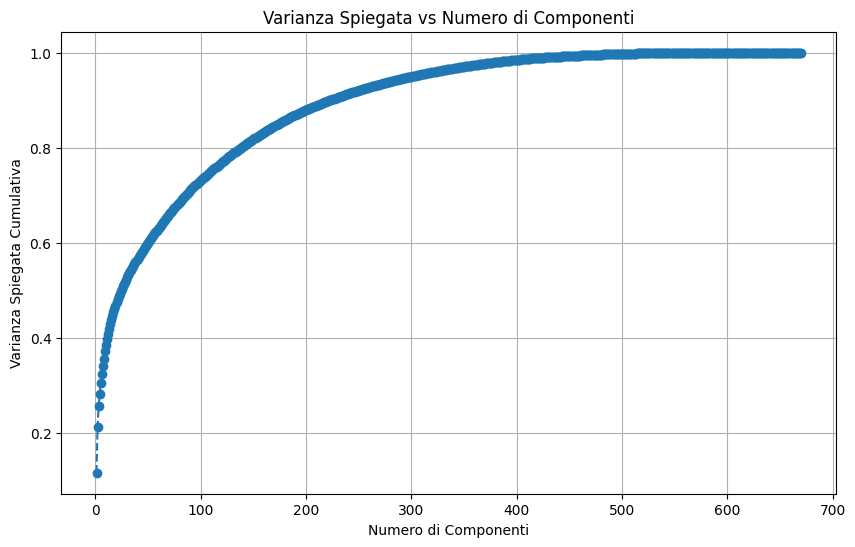

Numero di componenti scelto: 301


In [48]:
# Calcola la varianza spiegata cumulativa
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Visualizza la varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata vs Numero di Componenti')
plt.grid()
plt.show()

# Seleziona il numero di componenti per spiegare il 95% della varianza
n_components = next(i for i, v in enumerate(explained_variance_ratio) if v >= 0.95) + 1
print(f"Numero di componenti scelto: {n_components}")

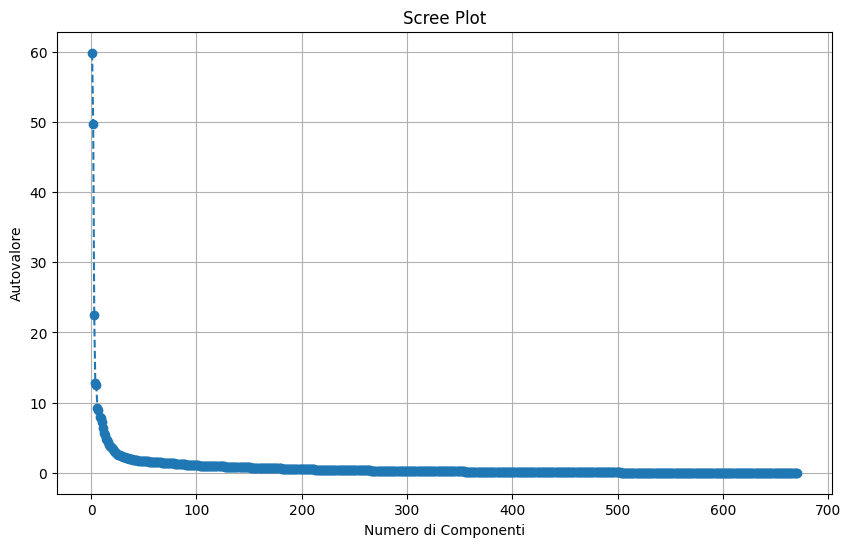

In [30]:
# Autovalori delle componenti principali
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Autovalore')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [57]:
# Inizializza la PCA con il numero di componenti selezionato
pca = PCA(n_components=n_components)

# Applica la trasformazione PCA mantenendo le feature numeriche
principal_components = pca.fit_transform(features_clipped_df.drop(columns=["Subject", "Test", "Trial", "Bout", "Position"]))

# Creazione del DataFrame con le PC e MANTENIMENTO dell'INDICE ORIGINALE
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns, index=features_clipped_df.index)  # Mantiene l'indice

# Aggiungi i metadati (Position, Subject, etc.)
pca_df['Position'] = features_clipped_df['Position']
pca_df['Subject'] = features_clipped_df['Subject']

# Verifica della consistenza delle dimensioni
print(f"Righe in features_clipped_df: {features_clipped_df.shape[0]}")
print(f"Righe in pca_df dopo la trasformazione: {pca_df.shape[0]}")

Righe in features_clipped_df: 126111
Righe in pca_df dopo la trasformazione: 126111


In [58]:
# Salva il dataset pronto per il training
output_path = "/Volumes/Mac/DatasetSP/pipeline1/PCs_costruction.csv"
pca_df.to_csv(output_path, index=False)

In [59]:
# Installazione di MLflow se necessario
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import os
import pickle
from tqdm import tqdm
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Imposta il percorso per salvare i log
mlflow.set_experiment("Pipeline1")  # Nome dell'esperimento

print("Esperimento MLflow inizializzato!")

# Funzione per caricare il dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Funzione per preprocessare i dati
def preprocess_data(data):
    X = data.drop(columns=['Position', 'Subject'])
    y = data['Position']
    subjects = data['Subject']
    return X, y, subjects

# Percorso del dataset
data_file = "/Volumes/Mac/DatasetSP/pipeline1/PCs_costruction.csv"

# Caricamento dati
print("Caricamento del dataset...")
data = load_data(data_file)
print("Dataset caricato con successo!")

print("Preprocessing dei dati...")
X, y, subjects = preprocess_data(data)
print("Preprocessing completato!")

# Definizione input per i modelli
input_dim = X.shape[1]
num_classes = len(np.unique(y))


Esperimento MLflow inizializzato!
Caricamento del dataset...
Dataset caricato con successo!
Preprocessing dei dati...
Preprocessing completato!


In [60]:
# Funzione per generare e salvare i fold
def save_folds(X, y, subjects, n_splits=5, save_path="fold_indices.pkl"):
    group_kfold = GroupKFold(n_splits=n_splits)
    folds = list(group_kfold.split(X, y, groups=subjects))
    with open(save_path, "wb") as f:
        pickle.dump(folds, f)
    print(f"Folds salvati in {save_path}")

# Funzione per caricare i fold
def load_folds(load_path="fold_indices.pkl"):
    try:
        with open(load_path, "rb") as f:
            folds = pickle.load(f)
        print(f"Folds caricati da {load_path}")
        return folds
    except FileNotFoundError:
        print(f"Errore: Il file {load_path} non esiste.")
        return None

# Creazione o caricamento dei fold
fold_path = "/Users/giorgio/Desktop/SmartphonePositioning/src/modeling/fold_indices.pkl"
folds = load_folds(fold_path)
if folds is None:
    save_folds(X, y, subjects, save_path=fold_path)
    folds = load_folds(fold_path)


Folds caricati da /Users/giorgio/Desktop/SmartphonePositioning/src/modeling/fold_indices.pkl


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name, fold_idx):
    """Genera e salva la Confusion Matrix come immagine."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predetto")
    plt.ylabel("Reale")
    plt.title(f"Confusion Matrix - {model_name} (Fold {fold_idx})")

    # Salvataggio immagine
    cm_filename = f"{model_name}_confusion_matrix_fold_{fold_idx}.png"
    plt.savefig(cm_filename)
    plt.close()

    return cm_filename


In [64]:
import json
import pandas as pd

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'XGBoost': XGBClassifier(n_jobs=8, max_depth=8, colsample_bytree=0.8, subsample=0.8, n_estimators=150, random_state=42),
    'Logistic Regression': LogisticRegression(n_jobs=-1, max_iter=1000, random_state=42)
}

def train_and_evaluate_mlflow(model_name, model, X, y, subjects, folds, experiment_name):
    print(f"\nInizio training modello: {model_name}")
    start_time = time.time()

    # Inizializza l'esperimento in MLflow
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name=model_name):
        # Definizione dei percorsi per l'organizzazione dei file
        experiment_path = os.path.join("mlruns", experiment_name)
        model_path = os.path.join(experiment_path, "models", model_name)
        log_path = os.path.join(experiment_path, "logs", model_name)
        artifact_path = os.path.join(experiment_path, "artifacts", model_name)

        os.makedirs(model_path, exist_ok=True)
        os.makedirs(log_path, exist_ok=True)
        os.makedirs(artifact_path, exist_ok=True)

        # Log dei parametri del modello
        if hasattr(model, "get_params"):
            params = model.get_params()
            mlflow.log_params(params)  # Logga tutti i parametri del modello
        else:
            print(f"[{model_name}] Nessun parametro disponibile per il log.")

        cv_scores = []
        reports = []

        for fold_idx, (train_idx, test_idx) in enumerate(tqdm(folds, desc="Cross-validation folds")):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            cv_scores.append(score)

            # Generazione del classification report
            report = classification_report(y_test, y_pred, output_dict=True)
            reports.append(report)

            # Creazione della Confusion Matrix
            cm_filename = os.path.join(log_path, f"confusion_matrix_fold_{fold_idx}.png")
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix - {model_name} Fold {fold_idx}')
            plt.savefig(cm_filename)
            plt.close()

            # Log delle metriche su MLflow
            mlflow.log_metric(f"accuracy_fold_{fold_idx}", score)
            mlflow.log_artifact(cm_filename)  # Log della Confusion Matrix su MLflow

        # Log finale su MLflow
        mlflow.log_metric("Mean_CV_Accuracy", np.mean(cv_scores))
        mlflow.log_metric("Std_CV_Accuracy", np.std(cv_scores))

        # Salvataggio del modello con input_example
        input_example = pd.DataFrame(X.iloc[:1])  # Usa una riga di X come esempio di input
        mlflow.sklearn.log_model(model, model_path, input_example=input_example)

        # Salvataggio classification report come JSON
        report_path = os.path.join(artifact_path, f"{model_name}_classification_report.json")
        with open(report_path, "w") as f:
            json.dump(reports, f, indent=4)

        # Log del classification report come artifact su MLflow
        mlflow.log_artifact(report_path)

    elapsed_time = time.time() - start_time
    print(f"[{model_name}] Training completato in {elapsed_time:.2f} secondi.")


In [67]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_ann(input_dim, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate_ann_mlflow(X, y, subjects, folds, experiment_name):
    print("\nInizio training modello: ANN")
    start_time = time.time()

    # Imposta l'esperimento in MLflow
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name="ANN"):
        # Creazione delle directory per organizzare i file
        experiment_path = os.path.join("mlruns", experiment_name)
        model_path = os.path.join(experiment_path, "models", "ANN")
        log_path = os.path.join(experiment_path, "logs", "ANN")
        artifact_path = os.path.join(experiment_path, "artifacts", "ANN")

        os.makedirs(model_path, exist_ok=True)
        os.makedirs(log_path, exist_ok=True)
        os.makedirs(artifact_path, exist_ok=True)

        # Log dei parametri dell'ANN
        mlflow.log_params({
            "Layers": "[128, 64, num_classes]",
            "Activation": "relu",
            "Optimizer": "adam",
            "Learning Rate": 0.01,
            "Loss": "sparse_categorical_crossentropy",
            "Epochs": 50,
            "Batch Size": 256,
            "Early Stopping": False
        })

        cv_scores = []
        reports = []
        training_logs = {}

        for fold_idx, (train_idx, test_idx) in enumerate(tqdm(folds, desc="Cross-validation folds")):
            model = create_ann(X.shape[1], len(np.unique(y)))

            # Imposta l'optimizer con learning rate 0.01
            model.compile(
                optimizer=Adam(learning_rate=0.01),  # Learning rate personalizzato
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
            )

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Training senza Early Stopping
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50, batch_size=256,
                verbose=1
            )

            # Salvataggio log di training
            training_logs[f"fold_{fold_idx}"] = {
                "loss": history.history["loss"],
                "accuracy": history.history["accuracy"],
                "val_loss": history.history["val_loss"],
                "val_accuracy": history.history["val_accuracy"]
            }

            # Valutazione
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            score = accuracy_score(y_test, y_pred_classes)
            cv_scores.append(score)

            # Generiamo il classification report
            report = classification_report(y_test, y_pred_classes, output_dict=True)
            reports.append(report)

            # Creiamo e salviamo la Confusion Matrix
            cm_filename = os.path.join(log_path, f"confusion_matrix_fold_{fold_idx}.png")
            cm = confusion_matrix(y_test, y_pred_classes)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix - ANN Fold {fold_idx}')
            plt.savefig(cm_filename)
            plt.close()

            # Log delle metriche su MLflow
            mlflow.log_metric(f"accuracy_fold_{fold_idx}", score)
            mlflow.log_artifact(cm_filename)  # Log della Confusion Matrix su MLflow

        # Log finali
        mlflow.log_metric("Mean_CV_Accuracy", np.mean(cv_scores))
        mlflow.log_metric("Std_CV_Accuracy", np.std(cv_scores))

        # Salvataggio modello ANN su MLflow con input_example
        input_example = tf.convert_to_tensor(X.iloc[:1].values.astype(np.float32))
        model.save(model_path)
        mlflow.tensorflow.log_model(model, model_path, input_example=input_example)

        # Salvataggio classification report come JSON
        report_path = os.path.join(artifact_path, "ANN_classification_report.json")
        with open(report_path, "w") as f:
            json.dump(reports, f, indent=4)
        mlflow.log_artifact(report_path)

        # Salvataggio dei log di training
        training_log_path = os.path.join(log_path, "training_logs.json")
        with open(training_log_path, "w") as f:
            json.dump(training_logs, f, indent=4)
        mlflow.log_artifact(training_log_path)

    elapsed_time = time.time() - start_time
    print(f"[ANN] Training completato in {elapsed_time:.2f} secondi.")


In [68]:
# Definisci il nome dell'esperimento
experiment_name = "Pipeline1"

print(f"Inizio training e logging con MLflow per l'esperimento '{experiment_name}'...")

# Allenamento per i modelli classici (Random Forest, XGBoost, Logistic Regression)
for model_name, model in models.items():
    train_and_evaluate_mlflow(model_name, model, X, y, subjects, folds, experiment_name)

# Allenamento per il modello ANN
train_and_evaluate_ann_mlflow(X, y, subjects, folds, experiment_name)

print(f"✅ Training completato per tutti i modelli! Controlla MLflow UI per i risultati dell'esperimento '{experiment_name}'.")


Inizio training e logging con MLflow per l'esperimento 'Pipeline1'...

Inizio training modello: Random Forest


Cross-validation folds: 100%|██████████| 5/5 [02:00<00:00, 24.19s/it]
2025/01/29 16:04:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/355703626022166431/runs/c9fcfe8f05f444248c903913613d3a19
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/355703626022166431
[Random Forest] Training completato in 124.56 secondi.

Inizio training modello: XGBoost


Cross-validation folds: 100%|██████████| 5/5 [03:14<00:00, 38.87s/it]
2025/01/29 16:07:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/355703626022166431/runs/c70c00e503bd4a09a1b8da647fb00a81
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/355703626022166431
[XGBoost] Training completato in 196.11 secondi.

Inizio training modello: Logistic Regression


Cross-validation folds: 100%|██████████| 5/5 [00:24<00:00,  4.92s/it]
2025/01/29 16:08:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/355703626022166431/runs/bf24f28e78774e579334fac851e29385
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/355703626022166431
[Logistic Regression] Training completato in 26.12 secondi.

Inizio training modello: ANN


Cross-validation folds:   0%|          | 0/5 [00:00<?, ?it/s]/Users/giorgio/Desktop/SmartphonePositioning/tf-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2759 - loss: 2.5003 - val_accuracy: 0.2505 - val_loss: 10.6893
Epoch 2/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2503 - loss: 11.5308 - val_accuracy: 0.2165 - val_loss: 23.1343
Epoch 3/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2486 - loss: 26.8152 - val_accuracy: 0.2763 - val_loss: 60.3538
Epoch 4/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2560 - loss: 63.5467 - val_accuracy: 0.2012 - val_loss: 100.6729
Epoch 5/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2519 - loss: 79.3453 - val_accuracy: 0.2131 - val_loss: 123.2107
Epoch 6/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2578 - loss: 99.0570 - val_accuracy: 0.2286 - val_loss: 97.1469
Epoch 7/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2539 - loss: 135.7654 - val_accuracy: 0.1989 - val_loss: 185.9816
Epoch 8/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2560 - loss: 150.5493

Cross-validation folds:  20%|██        | 1/5 [01:55<07:43, 115.93s/it]/Users/giorgio/Desktop/SmartphonePositioning/tf-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2846 - loss: 2.0318 - val_accuracy: 0.2064 - val_loss: 4.1180
Epoch 2/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2555 - loss: 4.7346 - val_accuracy: 0.2100 - val_loss: 7.0289
Epoch 3/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2476 - loss: 11.4804 - val_accuracy: 0.2072 - val_loss: 13.3673
Epoch 4/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2525 - loss: 14.7959 - val_accuracy: 0.2698 - val_loss: 11.3008
Epoch 5/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2484 - loss: 20.4623 - val_accuracy: 0.2525 - val_loss: 25.9792
Epoch 6/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2487 - loss: 26.6393 - val_accuracy: 0.2673 - val_loss: 30.5214
Epoch 7/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2550 - loss: 33.0127 - val_accuracy: 0.2383 - val_loss: 40.2021
Epoch 8/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2501 - loss: 37.3842 - val_a

Cross-validation folds:  40%|████      | 2/5 [03:51<05:47, 115.79s/it]/Users/giorgio/Desktop/SmartphonePositioning/tf-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2831 - loss: 2.4411 - val_accuracy: 0.2595 - val_loss: 12.5490
Epoch 2/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2436 - loss: 15.1440 - val_accuracy: 0.2937 - val_loss: 31.5869
Epoch 3/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2504 - loss: 32.9121 - val_accuracy: 0.2593 - val_loss: 53.3941
Epoch 4/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2512 - loss: 41.7635 - val_accuracy: 0.2763 - val_loss: 43.5207
Epoch 5/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2535 - loss: 55.3021 - val_accuracy: 0.2334 - val_loss: 64.9971
Epoch 6/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2555 - loss: 91.0065 - val_accuracy: 0.2178 - val_loss: 125.4165
Epoch 7/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2542 - loss: 106.7752 - val_accuracy: 0.3250 - val_loss: 89.0798
Epoch 8/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2542 - loss: 112.6075 -

Cross-validation folds:  60%|██████    | 3/5 [05:47<03:51, 115.84s/it]

Epoch 1/50


/Users/giorgio/Desktop/SmartphonePositioning/tf-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2931 - loss: 2.3423 - val_accuracy: 0.2214 - val_loss: 10.7087
Epoch 2/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2664 - loss: 7.5118 - val_accuracy: 0.2591 - val_loss: 25.9661
Epoch 3/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2549 - loss: 21.9656 - val_accuracy: 0.1901 - val_loss: 65.5427
Epoch 4/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2606 - loss: 34.6432 - val_accuracy: 0.1779 - val_loss: 147.5469
Epoch 5/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2602 - loss: 60.3345 - val_accuracy: 0.2364 - val_loss: 100.7781
Epoch 6/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2652 - loss: 68.5782 - val_accuracy: 0.2210 - val_loss: 115.4636
Epoch 7/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2630 - loss: 100.9932 - val_accuracy: 0.2452 - val_loss: 92.9862
Epoch 8/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2633 - loss: 106.1754 - val_accur

Cross-validation folds:  80%|████████  | 4/5 [07:41<01:55, 115.29s/it]

Epoch 1/50


/Users/giorgio/Desktop/SmartphonePositioning/tf-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


389/389 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2984 - loss: 2.4127 - val_accuracy: 0.2185 - val_loss: 10.9082
Epoch 2/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2612 - loss: 12.9383 - val_accuracy: 0.1801 - val_loss: 25.0304
Epoch 3/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2633 - loss: 27.3962 - val_accuracy: 0.2283 - val_loss: 67.8175
Epoch 4/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2669 - loss: 42.9400 - val_accuracy: 0.1981 - val_loss: 57.5897
Epoch 5/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2680 - loss: 51.4096 - val_accuracy: 0.2013 - val_loss: 117.9249
Epoch 6/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2623 - loss: 85.0975 - val_accuracy: 0.2187 - val_loss: 107.7664
Epoch 7/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2683 - loss: 104.9831 - val_accuracy: 0.2281 - val_loss: 120.1704
Epoch 8/50
389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2691 - loss: 109.3375 - val_accu

Cross-validation folds: 100%|██████████| 5/5 [09:36<00:00, 115.35s/it]

🏃 View run ANN at: http://127.0.0.1:5000/#/experiments/355703626022166431/runs/90f7e1ca50f541c0bed4bc084c5b2539
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/355703626022166431


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=mlruns/Pipeline1/models/ANN.